In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("layoffs.csv")

In [3]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Replit,SF Bay Area,Product,30.0,0.20,2024-05-16,Unknown,United States,222.0
1,Gopuff,Philadelphia,Food,NaN,0.06,2024-05-16,Series H,United States,3400.0
2,Atmosphere,Austin,Other,100.0,NaN,2024-05-15,Series D,United States,214.0
3,Singularity 6,Los Angeles,Other,36.0,NaN,2024-05-15,Series B,United States,49.0
4,Mainvest,Boston,Finance,NaN,1.00,2024-05-14,Unknown,United States,3.0
...,...,...,...,...,...,...,...,...,...
3607,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1
3608,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0
3609,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0
3610,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              3612 non-null   object 
 1   location             3611 non-null   object 
 2   industry             3611 non-null   object 
 3   total_laid_off       2369 non-null   float64
 4   percentage_laid_off  2322 non-null   float64
 5   date                 3612 non-null   object 
 6   stage                3605 non-null   object 
 7   country              3612 non-null   object 
 8   funds_raised         3225 non-null   float64
dtypes: float64(3), object(6)
memory usage: 254.1+ KB


In [5]:
df.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1243
percentage_laid_off    1290
date                      0
stage                     7
country                   0
funds_raised            387
dtype: int64

In [6]:
df['stage'].value_counts()

stage
Post-IPO          759
Unknown           604
Series B          424
Series C          403
Series D          314
Acquired          312
Series A          244
Series E          171
Seed              117
Series F          101
Private Equity     63
Series H           33
Series G           22
Subsidiary         21
Series J            9
Series I            8
Name: count, dtype: int64

In [7]:
df[df['stage'].isnull()].shape

(7, 9)

In [8]:
df['total_laid_off'].value_counts()

total_laid_off
100.0     148
30.0      100
40.0       89
50.0       79
60.0       70
         ... 
371.0       1
141.0       1
1600.0      1
649.0       1
375.0       1
Name: count, Length: 340, dtype: int64

In [9]:
df[df['total_laid_off'].isnull()].shape

(1243, 9)

In [10]:
df['percentage_laid_off'].value_counts()

percentage_laid_off
1.000    247
0.100    225
0.200    184
0.150    140
0.250    121
        ... 
0.590      1
0.920      1
0.125      1
0.115      1
0.980      1
Name: count, Length: 77, dtype: int64

In [11]:
df[df['percentage_laid_off'].isnull()].shape

(1290, 9)

In [12]:
df['funds_raised'].value_counts()

funds_raised
2.0       33
1300.0    31
1.0       31
26.0      29
50.0      27
          ..
191.0      1
544.0      1
925.0      1
199.0      1
5.1        1
Name: count, Length: 730, dtype: int64

In [13]:
df[df['funds_raised'].isnull()].shape

(387, 9)

In [14]:
df['date'].unique()

array(['2024-05-16', '2024-05-15', '2024-05-14', '2024-05-13',
       '2024-05-10', '2024-05-09', '2024-05-08', '2024-05-07',
       '2024-05-06', '2024-05-03', '2024-05-02', '2024-05-01',
       '2024-04-30', '2024-04-29', '2024-04-27', '2024-04-25',
       '2024-04-24', '2024-04-23', '2024-04-19', '2024-04-18',
       '2024-04-17', '2024-04-16', '2024-04-15', '2024-04-12',
       '2024-04-11', '2024-04-10', '2024-04-09', '2024-04-08',
       '2024-04-07', '2024-04-06', '2024-04-04', '2024-04-03',
       '2024-04-02', '2024-04-01', '2024-03-28', '2024-03-26',
       '2024-03-25', '2024-03-22', '2024-03-20', '2024-03-19',
       '2024-03-18', '2024-03-16', '2024-03-15', '2024-03-14',
       '2024-03-13', '2024-03-12', '2024-03-11', '2024-03-08',
       '2024-03-07', '2024-03-06', '2024-03-05', '2024-03-04',
       '2024-03-01', '2024-02-29', '2024-02-28', '2024-02-27',
       '2024-02-26', '2024-02-23', '2024-02-22', '2024-02-21',
       '2024-02-20', '2024-02-16', '2024-02-15', '2024-

In [15]:
df['date'] = pd.to_datetime(df['date'])

In [16]:
 
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [17]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,day,month,year
0,Replit,SF Bay Area,Product,30.0,0.20,2024-05-16,Unknown,United States,222.0,16,5,2024
1,Gopuff,Philadelphia,Food,NaN,0.06,2024-05-16,Series H,United States,3400.0,16,5,2024
2,Atmosphere,Austin,Other,100.0,NaN,2024-05-15,Series D,United States,214.0,15,5,2024
3,Singularity 6,Los Angeles,Other,36.0,NaN,2024-05-15,Series B,United States,49.0,15,5,2024
4,Mainvest,Boston,Finance,NaN,1.00,2024-05-14,Unknown,United States,3.0,14,5,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
3607,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,Seed,United States,5.1,16,3,2020
3608,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,Unknown,United States,45.0,13,3,2020
3609,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,Seed,United States,1.0,13,3,2020
3610,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,Series C,United States,90.0,12,3,2020


In [18]:
df.isnull().sum()

company                   0
location                  1
industry                  1
total_laid_off         1243
percentage_laid_off    1290
date                      0
stage                     7
country                   0
funds_raised            387
day                       0
month                     0
year                      0
dtype: int64

In [19]:
df['total_laid_off'].unique()

array([3.000e+01,       nan, 1.000e+02, 3.600e+01, 1.000e+03, 5.500e+02,
       1.200e+02, 5.700e+01, 8.000e+02, 1.450e+02, 9.600e+01, 1.700e+02,
       2.300e+02, 1.500e+02, 1.400e+02, 1.160e+02, 2.800e+01, 4.000e+02,
       2.900e+01, 2.000e+02, 1.120e+02, 5.000e+02, 3.300e+03, 1.800e+02,
       5.000e+01, 2.000e+01, 5.790e+02, 1.200e+01, 1.400e+04, 2.500e+01,
       2.500e+02, 3.820e+02, 6.200e+01, 7.900e+01, 4.900e+01, 7.000e+01,
       6.140e+02, 2.800e+02, 1.300e+01, 6.700e+01, 6.000e+01, 1.700e+01,
       6.000e+03, 1.950e+02, 5.400e+01, 8.100e+01, 1.400e+01, 8.000e+01,
       1.100e+01, 2.400e+01, 1.500e+01, 2.200e+01, 9.000e+01, 4.000e+01,
       6.700e+02, 3.200e+02, 9.000e+02, 3.500e+02, 1.500e+03, 7.700e+01,
       5.600e+01, 5.500e+01, 2.000e+03, 1.060e+02, 4.250e+03, 1.900e+01,
       1.600e+02, 2.100e+01, 2.750e+02, 6.500e+01, 4.400e+02, 1.680e+02,
       2.450e+02, 3.500e+01, 1.110e+02, 1.300e+02, 9.500e+01, 2.500e+03,
       2.160e+02, 7.000e+00, 8.800e+01, 7.000e+02, 

In [20]:
df['total_laid_off'].mean()

257.2097931616716

In [21]:
df.loc[df['total_laid_off'].isnull(),'total_laid_off'] = 257.2097931616716

In [22]:
df[df['total_laid_off'].isnull()].shape

(0, 12)

In [23]:
df['percentage_laid_off'].unique()

array([0.2   , 0.06  ,    nan, 1.    , 0.08  , 0.4   , 0.13  , 0.25  ,
       0.15  , 0.33  , 0.49  , 0.03  , 0.46  , 0.1   , 0.27  , 0.16  ,
       0.05  , 0.01  , 0.04  , 0.32  , 0.35  , 0.44  , 0.24  , 0.07  ,
       0.02  , 0.6   , 0.14  , 0.3   , 0.17  , 0.12  , 0.18  , 0.19  ,
       0.09  , 0.31  , 0.9   , 0.11  , 0.7   , 0.8   , 0.28  , 0.38  ,
       0.67  , 0.29  , 0.5   , 0.36  , 0.22  , 0.37  , 0.21  , 0.57  ,
       0.75  , 0.34  , 0.59  , 0.26  , 0.85  , 0.23  , 0.92  , 0.45  ,
       0.7   , 0.72  , 0.65  , 0.43  , 0.39  , 0.57  , 0.115 , 0.125 ,
       0.48  , 0.82  , 0.42  , 0.54  , 0.96  , 0.035 , 0.    , 0.55  ,
       0.95  , 0.054 , 0.0185, 0.53  , 0.41  , 0.98  ])

In [24]:
df['percentage_laid_off'].mean()

0.2807095176571921

In [25]:
df.loc[df['percentage_laid_off'].isnull(),'percentage_laid_off']=0.2807095176571921

In [26]:
df[df['percentage_laid_off'].isnull()].shape

(0, 12)

In [27]:
df['funds_raised'].unique()

array([2.220e+02, 3.400e+03, 2.140e+02, 4.900e+01, 3.000e+00, 5.000e+00,
             nan, 1.070e+04, 2.600e+01, 8.340e+02, 7.200e+01, 6.400e+01,
       1.000e+03, 5.160e+02, 8.990e+02, 7.800e+02, 4.290e+02, 9.320e+02,
       1.900e+03, 6.010e+02, 3.800e+01, 2.020e+04, 2.710e+02, 1.800e+03,
       5.000e+03, 6.000e+00, 1.700e+03, 1.300e+02, 1.580e+02, 1.450e+02,
       3.300e+03, 1.400e+03, 2.990e+02, 8.020e+02, 3.500e+01, 1.800e+02,
       1.590e+02, 1.740e+02, 4.000e+02, 1.000e+00, 4.100e+03, 7.500e+01,
       6.100e+01, 1.200e+03, 3.360e+02, 8.260e+02, 8.900e+01, 3.200e+01,
       5.500e+01, 6.790e+02, 1.200e+01, 2.400e+01, 1.790e+02, 2.470e+02,
       6.000e+01, 1.080e+02, 5.470e+02, 5.500e+03, 1.040e+02, 2.000e+00,
       1.090e+02, 5.200e+01, 2.300e+02, 7.900e+01, 2.880e+02, 3.500e+03,
       7.500e+02, 3.550e+02, 5.000e+01, 1.760e+02, 3.990e+02, 3.020e+02,
       1.600e+01, 3.300e+01, 4.200e+01, 4.800e+02, 8.600e+01, 4.400e+01,
       3.900e+01, 1.470e+02, 7.390e+02, 2.600e+04, 

In [28]:
df['funds_raised'].mean()

799.4837195348838

In [29]:
df.loc[df['funds_raised'].isnull(),'funds_raised'] = 799.4837195348838

In [30]:
df[df['funds_raised'].isnull()].shape

(0, 12)

In [31]:
df['stage'].unique()

array(['Unknown', 'Series H', 'Series D', 'Series B', 'Acquired',
       'Post-IPO', 'Series E', 'Series J', 'Seed', 'Series G', 'Series C',
       'Private Equity', 'Series A', 'Subsidiary', 'Series F', 'Series I',
       nan], dtype=object)

In [32]:
df['stage'].mode()

0    Post-IPO
Name: stage, dtype: object

In [33]:
df.loc[df['stage'].isnull(),'stage'] = "Post-IPO"

In [34]:
df[df['stage'].isnull()].shape

(0, 12)

In [35]:
df['location'].mode()

0    SF Bay Area
Name: location, dtype: object

In [36]:
df.loc[df['location'].isnull(),'location']='SF Bay Area'

In [37]:
df['industry'].mode()

0    Finance
Name: industry, dtype: object

In [38]:
df.loc[df['industry'].isnull(),'industry']='Finance'

In [39]:
df.isnull().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
day                    0
month                  0
year                   0
dtype: int64

In [40]:
# final = df.dropna()

In [41]:
import seaborn as sns

In [42]:
# pip install seaborn

<Axes: xlabel='count', ylabel='industry'>

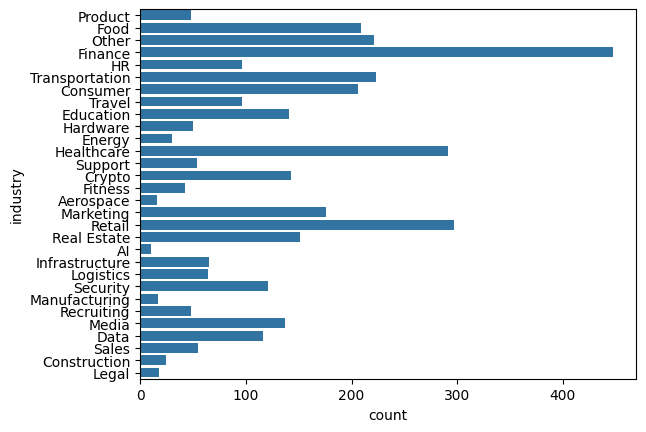

In [43]:
sns.countplot(df['industry'])

<Axes: xlabel='count', ylabel='stage'>

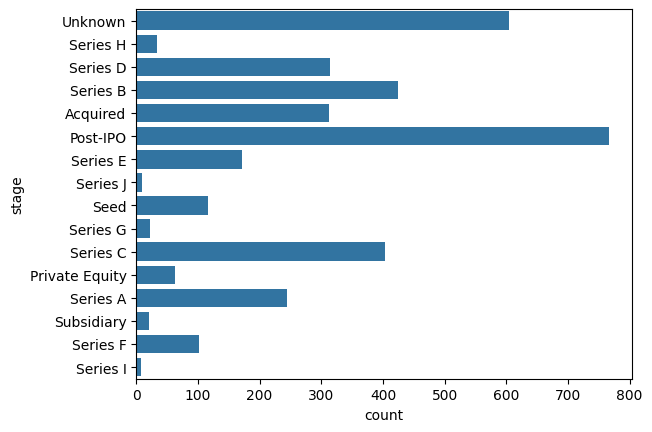

In [44]:
sns.countplot(df['stage'])

11.732014550737942

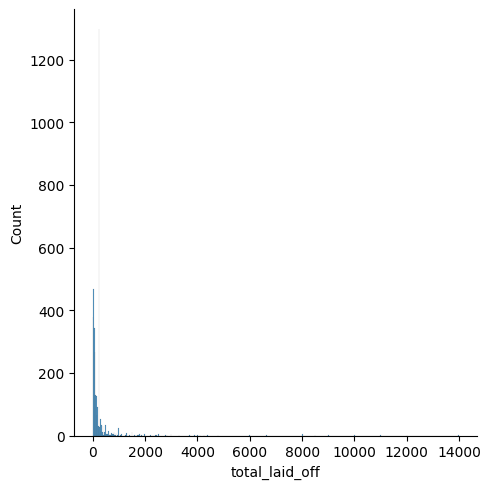

In [45]:

sns.displot(df['total_laid_off'])
df['total_laid_off'].skew()

2.0855220065273015

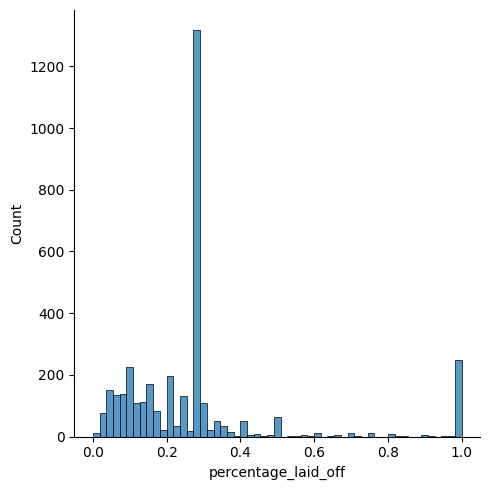

In [46]:
sns.displot(df['percentage_laid_off'])
df['percentage_laid_off'].skew()

22.184589344556514

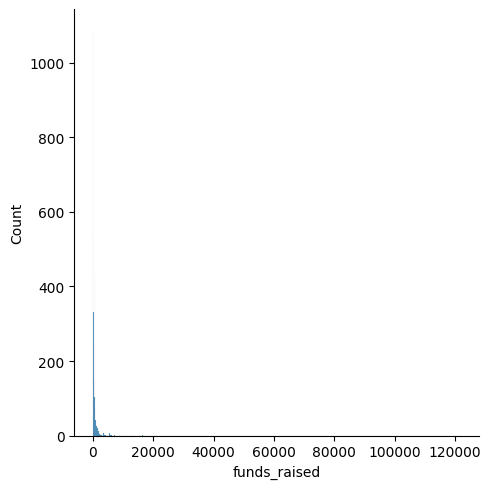

In [47]:
sns.displot(df['funds_raised'])
df['funds_raised'].skew()

-0.6944124358672502

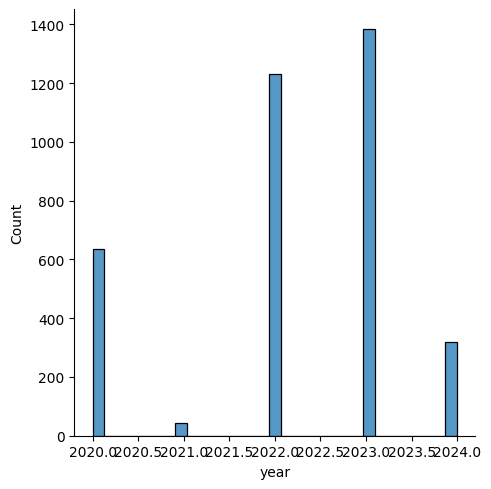

In [48]:
sns.displot(df['year'])
df['year'].skew()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3612 entries, 0 to 3611
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              3612 non-null   object        
 1   location             3612 non-null   object        
 2   industry             3612 non-null   object        
 3   total_laid_off       3612 non-null   float64       
 4   percentage_laid_off  3612 non-null   float64       
 5   date                 3612 non-null   datetime64[ns]
 6   stage                3612 non-null   object        
 7   country              3612 non-null   object        
 8   funds_raised         3612 non-null   float64       
 9   day                  3612 non-null   int32         
 10  month                3612 non-null   int32         
 11  year                 3612 non-null   int32         
dtypes: datetime64[ns](1), float64(3), int32(3), object(5)
memory usage: 296.4+ KB


In [50]:
df['company'].value_counts()

company
Amazon           12
Google           11
Rivian            8
Expedia           6
Unity             6
                 ..
TikTok India      1
Titan Medical     1
Moladin           1
Casavo            1
Tamara Mellon     1
Name: count, Length: 2583, dtype: int64

In [51]:
df['company'].unique()

array(['Replit', 'Gopuff', 'Atmosphere', ..., 'Help.com', 'Panda Squad',
       'Tamara Mellon'], dtype=object)

In [52]:
unique_companies = df['company'].unique()
for company in unique_companies:
    print(company)

Replit
Gopuff
Atmosphere
Singularity 6
Mainvest
Indeed
Motional
Rivian
Google
Vacasa
PrepLadder
Simpl
Arkane Studios
Brilliant
Hopin
Enovix
Cue Health
Luminar
Sprinklr
Bakkt
Peloton
Cabify
Assurance
Sproutt
Tesla
Akili Interactive
Getir
Ola
ComplYant
Fisker
HealthifyMe
True Anomaly
Grin
Expedia
Freenome
Heureka Group
98point6
OutSystems
Homie
The Good Glamm Group
Showpad
Stability AI
Pax8
ConnectWise
Take-Two
Tome
Criteo
Glovo
TikTok
Fabric
Hinge Health
Zoe
Cornershop
Scaler
Checkr
Intel
Trendsales
Fission
Bolt.Earth
Apple
Agility Robotics
Lightspeed Commerce
Ghost Autonomy
Vivian Health
Amazon
CoRover
Kaseya
New Relic
Yummly
Byju's
Lentra
Thepeer
Osso VR
Identiq
Ranger Insurance
Rezi
ChowNow
Synctera
GoPro
Dell
Verily
Cybereason
ShopBack
Orbotech
Airmeet
Singular Genomics
Longi
Flock Freight
Chipper Cash
Blueboard
Ancestry
Textio
Stash
Phantom Auto
IBM
Deadspin
Niche
Inscribe
Turnitin
Totango
Sorare
Meta
PlanetScale
MessageBird
Form Energy
Verbit
Edgio
Melio
Our Next Energy
Project Ro

In [53]:
uniques = df['company'].unique().tolist()
print(uniques)

['Replit', 'Gopuff', 'Atmosphere', 'Singularity 6', 'Mainvest', 'Indeed', 'Motional', 'Rivian', 'Google', 'Vacasa', 'PrepLadder', 'Simpl', 'Arkane Studios', 'Brilliant', 'Hopin', 'Enovix', 'Cue Health', 'Luminar', 'Sprinklr', 'Bakkt', 'Peloton', 'Cabify', 'Assurance', 'Sproutt', 'Tesla', 'Akili Interactive', 'Getir', 'Ola', 'ComplYant', 'Fisker', 'HealthifyMe', 'True Anomaly', 'Grin', 'Expedia', 'Freenome', 'Heureka Group', '98point6', 'OutSystems', 'Homie', 'The Good Glamm Group', 'Showpad', 'Stability AI', 'Pax8', 'ConnectWise', 'Take-Two', 'Tome', 'Criteo', 'Glovo', 'TikTok', 'Fabric', 'Hinge Health', 'Zoe', 'Cornershop', 'Scaler', 'Checkr', 'Intel', 'Trendsales', 'Fission', 'Bolt.Earth', 'Apple', 'Agility Robotics', 'Lightspeed Commerce', 'Ghost Autonomy', 'Vivian Health', 'Amazon', 'CoRover', 'Kaseya', 'New Relic', 'Yummly', "Byju's", 'Lentra', 'Thepeer', 'Osso VR', 'Identiq', 'Ranger Insurance', 'Rezi', 'ChowNow', 'Synctera', 'GoPro', 'Dell', 'Verily', 'Cybereason', 'ShopBack', '

In [54]:
comp = ['Replit', 'Gopuff', 'Atmosphere', 'Singularity 6', 'Mainvest', 'Indeed', 'Motional', 'Rivian', 'Google', 'Vacasa', 'PrepLadder', 'Simpl', 'Arkane Studios', 'Brilliant', 'Hopin', 'Enovix', 'Cue Health', 'Luminar', 'Sprinklr', 'Bakkt', 'Peloton', 'Cabify', 'Assurance', 'Sproutt', 'Tesla', 'Akili Interactive', 'Getir', 'Ola', 'ComplYant', 'Fisker', 'HealthifyMe', 'True Anomaly', 'Grin', 'Expedia', 'Freenome', 'Heureka Group', '98point6', 'OutSystems', 'Homie', 'The Good Glamm Group', 'Showpad', 'Stability AI', 'Pax8', 'ConnectWise', 'Take-Two', 'Tome', 'Criteo', 'Glovo', 'TikTok', 'Fabric', 'Hinge Health', 'Zoe', 'Cornershop', 'Scaler', 'Checkr', 'Intel', 'Trendsales', 'Fission', 'Bolt.Earth', 'Apple', 'Agility Robotics', 'Lightspeed Commerce', 'Ghost Autonomy', 'Vivian Health', 'Amazon', 'CoRover', 'Kaseya', 'New Relic', 'Yummly', "Byju's", 'Lentra', 'Thepeer', 'Osso VR', 'Identiq', 'Ranger Insurance', 'Rezi', 'ChowNow', 'Synctera', 'GoPro', 'Dell', 'Verily', 'Cybereason', 'ShopBack', 'Orbotech', 'Airmeet', 'Singular Genomics', 'Longi', 'Flock Freight', 'Chipper Cash', 'Blueboard', 'Ancestry', 'Textio', 'Stash', 'Phantom Auto', 'IBM', 'Deadspin', 'Niche', 'Inscribe', 'Turnitin', 'Totango', 'Sorare', 'Meta', 'PlanetScale', 'MessageBird', 'Form Energy', 'Verbit', 'Edgio', 'Melio', 'Our Next Energy', 'Project Ronin', 'Pristyn Care', 'Gro Intelligence', 'Tonik', 'Kevin', 'Electronic Arts', 'Treasury Prime', 'Sony Interactive', 'Bumble', 'PropertyGuru', 'WayCool', 'Daraz', 'Redesign Health', 'Carbon Health', 'Vice Media', 'Affirm', 'Finder', 'BuzzFeed', 'Aptiv', 'Tails.com', 'Auctane', 'KnownOrigin', 'Meati', 'Farfetch', 'Voi', 'Toast', 'Sonder', 'Storytel', 'CodeSee', 'May Mobility', 'Cisco', 'Wint Wealth', 'Away', 'Instacart', 'Mozilla', 'Impinj', 'Riskified', 'Everybuddy', 'Popcore', 'Wisense', 'SiriusXM', 'Licious', 'BlissClub', 'Kandji', 'Pure Storage', 'Otovo', 'Getaround', 'Journera', 'Grammarly', 'Fireblocks', 'Tenable', 'Workfellow', 'DocuSign', 'Glowforge', 'Snap', 'Drizly', 'BillGO', 'Impact.com', 'Astrate Medical', 'Meetup', 'Muvin', 'Nomad Health', 'Zwift', 'Top Hat', 'Cake Bikes', 'Small Robot Company', 'Twig', 'Okta', 'Zoom', 'Illumina', 'Polygon', 'Indigo', 'Proofpoint', 'Trove Recommerce', 'CircleCI', 'Thinx', 'Innoviz', 'The Messenger', 'Zuora', 'PayPal', 'Block', 'Kiwi.com', 'Aurora Solar', 'Wattpad', 'TechCrunch', 'Noom', 'Procore', 'Vipps', 'iRobot', 'DispatchHealth', 'Loopio', 'Salesforce', 'Flexport', 'Productboard', 'Microsoft', 'Swiggy', 'Veho', 'Amperity', 'MVPindex', 'Business Insider', 'Cova', 'Jamf', 'Cult.fit', 'Personio', 'Aurora', 'Desktop Metal', 'HubSpot', 'SAP', 'eBay', 'Vroom', 'Brex', 'Cure.fit', 'GoStudent', 'GoTo', 'Seedr', 'Riot Games', 'Xendit', '2U', 'SolarEdge', 'Wayfair', 'Fashinza', 'Stitch Fix', 'YouTube', 'Sirplus', 'SonderMind', 'First Mode', 'ALI Technologies', 'Thursday', 'Veeam', 'GrabCAD', 'Artifact', 'Dastgyr', 'Hologram', 'Vendr', 'New Work SE', 'Playtika', 'Discord', 'Inmobi', 'Audible', '7Shifts', 'Sisense', 'Cloudflare', '888', 'Certinia', 'Chief', 'Dextrous Robotics', 'Citrix', 'IAC', 'FreshDirect', 'Beam Benefits', 'Instagram', 'ChargePoint', 'SoFi', 'Twitch', 'Branch', 'Nevro', 'FullStory', 'Uber Freight', 'Rent the Runway', 'Treasure Financial', 'Humane', 'EVBox', 'Morning Consult', 'Trend Micro', 'Unity', 'Flipkart', 'NuScale Power', 'Flexe', 'Pitch', 'BenchSci', 'Here', 'Ledger Investing', 'Lendio', 'MeridianLink', 'LiveVox', 'NanoString Technologies', 'Lever', 'Trigo', 'InVision', 'VideoAmp', 'Xerox', 'Lazada Group ', 'Orca Security', 'Frontdesk', 'Strake', 'Paytm', 'Hyperloop One', 'Palmetto Clean Technology', 'ShareChat', 'InSightec', 'Kaspien', 'Enphase Energy', 'Udaan', 'Checkout.com', 'Arm Holdings', 'Delivery Hero', 'Jellysmack', 'Superpedestrian', 'Cruise', 'Solarisbank', 'Bolt', 'Curalie', 'Curbio', 'Flyhomes', 'Stellar Pizza', 'Invitae', 'Etsy', 'Analog Devices', 'ForgeRock', 'Flex', 'FourKites', 'Sojern', 'TomTom', 'Jungle Scout', 'SmileDirectClub', 'Sunfolding', 'Zulily', 'D2iQ', 'Simplilearn', 'Navan', 'Tidal', 'ZestMoney', 'Incredibuild', 'Bill.com', 'Contentful', 'Course Hero', 'Pivo', 'Yahoo', 'Spotify', 'TuSimple', 'Meow Wolf', 'DwellWell', 'Twilio', 'Filmic', 'Loco', 'Zepz', 'Domo', 'Mojo', 'Pipedrive', 'Vox Media', 'Dataminr', 'Multiverse', 'Tier Mobility', 'VMware', 'Bytedance', 'Veev', 'Anar', 'Alerzo', 'McMakler', 'Tulip Retail', 'Jodo', 'C3.ai', 'Presto', 'Physics Wallah', 'NextGen Healthcare', 'Buildertrend', 'Jane', 'Zazuu', 'Sierra Space', 'Paystack', 'Beamery', 'Sonos', 'FintechOS', 'FreshBooks', 'Landing', 'Uleet', 'Chewy', 'Sarcos', 'Cake Group', 'Halodoc', 'Markforged', 'Ping Identity', 'TripAdvisor', 'Bowery Farming', 'Carta', 'Commure', 'OSlash', 'BigCommerce', 'CloudKitchens', 'Oportun', 'Zillow', 'Nextdoor', 'Zeus Living', 'Ava Labs', 'Moore Threads', 'Pico Interactive', 'F5', 'NIO', 'OpenSea', 'Viasat', 'Beyond Meat', 'OpenSpace', 'Orchard', 'Sportradar', 'Informatica', 'Splunk', 'Faire', 'Sana Benefits', 'Olive', 'StepStone', 'Hubilo', 'Karat Financial', 'Hippo Insurance', 'Graphy', 'Salsify', ' F-Secure ', 'Virgio', 'Exabeam', 'Slync', 'SiFive', 'Pebble', 'Shipt', 'Parity Technologies', 'Roblox China', 'Tropic', 'Convoy', 'Bullhorn', 'LegalZoom', 'StellarAlgo', 'ManoMano', 'WeTransfer', 'Plume', 'Belora Paris', 'Made Renovation', 'Volta Trucks', 'Waymo', 'LinkedIn', 'CityMall', 'C2FO', 'Kayak / OpenTable', 'Bandcamp', 'Stack Overflow', 'PokerStars', 'Adda247', 'Uno Health', 'Qualcomm', 'Lending Club', 'MariaDB', 'Deepgram', 'Acronis', 'Neon', 'Blue Origin', 'Braid', 'Product Hunt', 'VTrips', 'Juniper Networks', 'InvestCloud', 'Brave', 'Dash', 'Shift', 'Yuga Labs', 'Bizongo', 'SchoolMint', 'SeekOut', 'Arrival', 'Ledger', 'Qualtrics', 'Hopper', 'Bird', 'Dare', 'Sendoso', 'Chainalysis', 'Synapse', 'Chia Network', 'IronNet', 'Sono Motors', 'Cowbell', 'N26', 'Andgo', 'Vendasta', 'Epic Games', 'Lululemon Studio', 'Fit Analytics', 'Fi.Money', 'Dunzo', 'Talkdesk', 'Lucid Software', 'Eat Just', 'Appsmith', 'Roblox', 'Foodpanda', 'Recast', 'DealShare', 'Merative', 'Robinhood', 'Akudo', 'Outreach', 'Truss Works', 'Nowadays', 'Hooray Foods', 'Sage Therapeutics copy', '7shifts', 'Velocity', 'Airtable', 'Project44', 'R3', 'Akili Labs', 'Evolve', 'Binance.US', 'Paper', 'Homeday', 'At-Bay', 'Eurora', 'Chargebee', 'Divvy Homes', 'Grabango', 'Bonterra ', 'Mollie', 'Oyster', 'Sensor Tower', 'Drift', 'Hijra', 'Roku', 'ForeScout', 'Better.com', 'iSpecimen', 'MaxMilhas', 'Absci', 'Hodinkee', 'Talent.com', 'mPharma', 'Xolo', 'Nexar', 'Khatabook', 'Clearcover', 'Gated', 'Lunchtime', 'Pegasystems', 'Biofourmis', 'Malwarebytes', 'SkyKick', 'Omuni', 'Kenko Health', 'Huma', 'Zeplin', '123Milhas', 'Zebra Technologies', 'CoinSwitch', 'Clockwork', 'SenseTime', 'HackerRank', 'Cuemath', 'Fortinet', 'Captiv8', 'Chingari', 'Atlas', 'Veriff', 'BlackLine', 'Rivos', 'Cellulant', 'JOIN', 'CoinDCX', 'Datagen', 'Hypefast', 'Tempo Automation', 'Recur', 'Unite Us', 'Twiga', 'Spartan Poker', 'Times Internet ', 'Detectify', 'Embrace', 'Zylo', 'AppFolio', 'StreamElements', 'FlexCar', 'Noice', 'SecureWorks', 'Easee', 'CoinDesk', 'iQiyi Smart', 'LingoAce', 'Shutterfly', 'SHINE Technologies', 'Hike', 'NCC Group', 'Blend', 'Niantic', 'Babylon Health', 'Dealtale', 'Bukalapak', 'Podium', 'Quizy', 'StyleSeat', 'Thoughtworks', 'Rapid7', 'MPL', 'Doximity', '23andMe', 'Caliva', 'Sendy', 'Verse', 'Qomplx', 'CodeClan', 'Astra', 'Big Cabal Media', 'Bardee', 'Aware', 'Ayoconnect', 'Finastra', 'Spinny', 'Tekion', 'BetterUp', 'Augury', 'Gem', 'Gupy', 'FamPay', 'Actyv.ai', 'ConnectedH', 'DICE', 'HackerOne', 'Silofit', 'Vesttoo', 'Planet', 'Archipelago', 'Increff', 'inDrive', 'Outreach ', 'Qoala', 'Fable', 'Cambricon', 'Kape Technologies', 'Eroad', 'Kape', 'Homology', 'Milkbasket', 'Wish', 'Point', 'Akseleran', 'Datree', 'Degreed', 'Copia', 'Figure', 'Calendly', 'Myntra', 'Kleos Space', 'Ripl', 'Deep Instict', 'Pluralsight', 'AppHarvest', 'Arive', 'Onfido', 'PathAI', 'Bundle Africa', 'Viaplay', 'Stoa', 'MiQ', 'Phunware', 'Saarthi.ai', 'AgentSync', 'Inspirato', 'Tilia', 'Blue Apron', 'Cameo', 'Square Roots', 'Code42', 'Ezoic', 'Lamudi Indonesia', 'Binance', 'PayScale', 'Navi Technologies', 'Skill Lync', 'AudioCodes', 'Deepwatch', 'Centr', 'Factorial', 'Bark', 'Khoros', 'Netlify', 'SAS', 'Dapper Labs', 'DeepVerge', 'Freightos', 'Circle', 'CyberGRX', 'Duck Creek Technologies', 'Matterport', 'Everquote', 'Built Technologies', 'Butterfly Network copy', 'Dukaan', 'Jasper', 'FrontRow', 'IntelyCare', 'Latch', 'Motive', 'Medsaf', 'Evernote', 'PaulCamper', 'Trellix', 'Amdocs', 'FNZ', 'Perfect Day', 'Solidigm', 'TytoCare', 'Circles.Life', 'ConnectRN', 'Crunchbase', 'DayTwo', 'Athennian', 'Vista Group', 'Highsnobiety', 'Zip', 'Buzzer', 'Lunya', 'MediaMath', 'Petal', 'Headspace', 'Artsy', 'Candy Digital', 'Xiaomi India', 'Torii', 'Insider Intelligence', 'Merama', 'Qyuki', 'Stripe', 'Vowel', 'ClickUp', 'Ludia', 'Karat', 'Plex', 'Starburst', 'Zapier', 'Selina', 'Tibber', 'ClearPay', 'Eyowo', 'Honor', 'Lordstown Motors', 'Waze', 'Payoneer', 'Joonko', 'IRL', 'Retool', 'Anaplan', 'Uber', 'Tackle.io', 'Ritual', 'Friday Health Plans', 'Mutiny', 'Grab', 'OLX Group', 'AvantStay', 'Karakuki', 'Panther', 'Fuzzy', 'Mojocare', 'Nikola', 'Pilot', 'Karshare', 'CareRev', 'TADA', 'Cerner', 'Bitwise', 'TrueCar', 'Olo', 'Mamaearth', 'Western Digital', 'JupiterOne', 'Zalando', 'Grubhub', 'GoCardless', 'Pendo', 'Chegg', 'dot.LA', 'TaxBit', 'Tiki', 'Trybe', 'Expel', 'Cityblock Health', 'Highspot', 'Cohesity', 'Freshworks', 'Opora', 'Nubank', 'Sumo Logic', 'Flatiron Health', 'HashiCorp', 'Ursa Major', 'Coherent', 'Reddit', 'Linktree', 'Dragos', 'Mara', 'Bunnii', 'Azibo', 'Meati Foods', 'ZoomInfo', 'Staffbase', 'Zume', 'Haven Technologies', 'Mural', 'Glamyo Health', 'Outbrain', 'CloudTrucks', 'CoachHub', 'Fractal Software', 'SentinelOne', 'SmartAsset', 'Zendesk', 'ZipRecruiter', 'Mux', 'Taxfix', 'Mensa Brands', 'Coupa', 'Nansen', 'PacketFabric', 'DHI Group', 'BenevolentAI', 'Circus Kitchens', 'Kabam', 'Guild', 'WillowTree', 'Flink', 'Alibaba Cloud', 'Brainly', 'Reliance JioMart', 'SoundCloud', 'Tractable', 'Daylight', 'FemTech Health', 'Paperless Parts', 'Nuance Communications', 'Moss', 'Pie Insurance', 'Clearbit', 'dbt Labs', 'L1ght', 'Nextbite', 'Formstack', 'Lemonade', 'DroneUp', 'Quanto', 'Cana', 'Nuro', 'Telenav', 'Happay', 'Slickdeals', 'Toothsi', 'Everlaw', 'Tessera', 'Varo', 'CS Disco', 'Redbubble', 'Similarweb', 'Akamai', 'Sonatype', 'Marqeta', 'Momentis Surgical', 'Glean AI', 'Everledger', 'Twist Bioscience', 'Meesho', 'Teachmint', 'Eventus', 'Shopify', 'Sabre', 'Scribe Media', 'Autograph', 'Earnix', 'Karma', 'Glassbox', 'Upwork', 'Cars24', 'Brightcove', 'Healthy.io', 'Zymergen', 'TheSkimm', 'Brightline', 'Bishop Fox', 'Zoomo', 'Vallai', 'Lev', 'PharmEasy', 'Vah Vah!', 'Cogito', 'Embark Vet', 'Poparazzi', 'Providoor', 'Dropbox', 'Alteryx', 'Greenhouse', 'Rebellion Defense', 'Poppulo', 'Megaport', 'Airtasker', 'Tickertape', 'Clubhouse', 'Oddle', 'Extramarks', 'Teampay', 'RenoRun', 'Rapid', 'Red Hat', 'BigPanda', 'Lyft', 'Benchling', 'Koo', 'Open', 'Gloat', 'Insider', 'Iress', 'Lenovo', 'WalkMe', 'Opendoor', 'Noon', 'Culture Amp', 'TRM Labs', 'CoLab', 'Ten Square Games', 'Ynsect', 'Kumu', 'Utopia Music', 'Quadream', 'Drip Capital', 'Community Gaming', 'Calibrate', 'OpenClassrooms', 'Sayurbox', 'Snyk', 'Astronomer', 'Bluepad', 'Heygo', 'Lazerpay', 'Mediafly', 'Science 37', 'Medtronic', 'Milkrun', 'Redfin', 'Permutive', 'Examedi', 'Acxiom', 'Euler Motors', 'Reforge', 'Nori', 'Practo', 'Pear Therapeutics', 'Workit Health', 'Absolute Software', 'Avocargo', 'Amplitude', '1K Kirana', 'Foundation Medicine', 'Boost', 'Cin7', 'Hyland Software', 'View', 'Guideline', 'Domestika', 'Airbyte', 'Hulu', 'LendingTree', 'FanClash', 'Loop', 'Crossbeam', 'AnswerLab', 'Endowus', 'GoodWorker', 'Kyndryl', 'Nowports', 'Unacademy', 'CoverMyMeds', 'Seagate', 'iCAD', 'Anyline', 'OnePipe', 'Lucid Motors', 'Blue Nile', 'AEye', 'Rackspace', 'Better Therapeutics', 'Aspiration', 'The Meet Group', 'Cimpress', 'TakeOff', 'Slite', 'Logitech', 'Glassdoor', 'Wejo', 'Copper', 'Rewind', 'Roofstock', 'Just Eat', 'Marvell', 'Workhuman', 'Xing', 'Mr Yum', 'Smallcase', 'GAMURS Group', 'Laybuy', 'Huuuge Games', 'Livspace', 'Symend', 'Candor Technology', 'Runtastic', 'Leafly', 'Bonusly', 'Klaviyo', 'Boxed', 'TradeWindow', 'Hometap', 'Fetch', 'Anchorage Digital', 'Avidbots', 'Samsung', 'Kaleidoscope', 'GoTo Group', 'Cookpad', 'Xero', 'Shopee', 'Wave Financial', 'Morning Brew', 'Neoleukin Therapeutics', 'Toucan', 'Appcues', 'Catch', 'RDX Works', 'Take-Two Interactive', 'Atlassian', 'UKG', 'UpGrad', 'HomeLane', 'Ankorstore', 'No Fluff Jobs', 'Loft', 'Embark Trucks', 'Lendi', 'UserTesting', 'Airbnb', 'Accolade', 'Zscaler', 'MasterClass', 'Ambev Tech', 'Fittr', 'CNET', 'Comparis', 'Kandela', 'Truckstop.com', 'iFood', 'Color Health', 'PayFit', 'Yellow.ai', 'Protego Trust Bank', 'Eventbrite', 'DUX Education', 'Cerebral', 'Amount', 'Palantir', 'Stytch', 'BitSight', 'Twitter', 'Ericsson', 'SAP Labs', 'Velodyne Lidar', 'Medallia', 'Lucira Health', 'Stax', 'EQRx', 'Poshmark', 'OneFootball', 'The Iconic', 'EVgo', 'StrongDM', 'Messari', 'Vibrent Health', 'Synamedia', 'TaskUs', 'Arch Oncology', 'Immutable', 'Jounce Therapeutics', 'Locomation', 'Green Labs', 'Crunchyroll', 'Ethos Life', 'Basis Technologies', 'PeerStreet', 'MyGate', 'Kinde', 'Fipola', 'HP', 'Micron', 'Tencent', 'Digimarc', 'Reserve', 'The RealReal', 'Smartsheet', 'Wix', 'ServiceTitan', 'DigitalOcean', 'Betterment', 'Momentive', 'Observe.AI', 'Religion of Sports', 'Tackle', 'Vicarious Surgical', 'Blackbaud', 'CommerceHub', 'Dropp', 'HackerEarth', 'PhableCare', 'Udemy', 'Electric', 'EMX Digital', 'PetLove', 'Collective Health', 'Magic Eden', 'Casavo', 'Moladin', 'TripleLift', 'Titan Medical', 'TikTok India', 'Syft Technologies', 'Open Co', 'Rigetti Computing', 'Wonderschool', 'Misfits Market', 'Deliveroo', 'Olive AI', 'GitLab', 'REE Automotive', 'GitHub', 'Quillt', 'WeTrade', 'GoDaddy', 'Gusto', 'Gong', 'Equitybee', 'Baraja', 'Koho', 'Medly', 'Nearmap', 'Salesloft', 'Openpay', 'LearnUpon', 'Loggi', 'Catch.com.au', 'VinFast US', 'Pocket Aces', 'Clari', 'C6 Bank', 'TenureX', 'Kyruus', 'Lightico', 'Eightfold AI', 'FarEye', 'Protocol Labs', 'Built Technologies copy', 'Autodesk', 'Mindstrong', 'Miro', 'Bittrex', 'Snowplow', 'Articulate', 'NCSoft', 'Sharesies', 'Pinterest', 'DraftKings', 'Cyren', 'Workato', 'VerticalScope', 'Wheel', 'Appgate', 'Exterro', 'Ada', 'Bustle Digital Group', 'Frequency Therapeutics', 'Match Group', 'Omnipresent', 'Picnic', 'NetApp', 'Workday', 'Upstart', 'Software AG', 'Wefox', 'Tilting Point', 'Gokada', 'AU10TIX', 'National Instruments', 'OpenText', 'Philips', 'Groupon', 'Impossible Foods copy', 'Chrono24', 'BM Technologies', 'Olist', 'Prime Trust', 'Quantum SI', 'Hoxhunt', 'Me Poupe', 'CoinTracker', 'SSense', 'Ruggable', 'Synopsys', 'Heycar', 'Matrixport', 'Shakepay', '#Paid', 'Decent', 'Feedzai', 'Nate', 'Soundwide', 'Confluent', 'Glisser', 'DriveWealth', 'Mode Global', 'Plus One Robotics', 'Quora', 'Lam Research', 'Luno', 'Clear Capital', 'Guardant Health', 'SirionLabs', 'PagSeguro', 'Prosus', 'Innovaccer', 'PartnerStack', 'Gitpod', 'OFFOR Health', 'Venngage', 'Corvus Insurance', 'Icon', 'PagerDuty', 'Scoro', 'Innovid', 'Booktopia', 'Ermetic', 'Namogoo', 'Camp K12', 'Gemini', 'Yext', 'BUX', 'MediBuddy', 'BitTorrent', 'Enjoei', 'Edifecs', 'Citrine Informatics', 'Avalara', 'Cyteir Therapeutics', 'Zappos', 'Capital One', 'Proterra', 'WeWork ', 'Saks.com', 'Hydrow', 'Earth Rides', 'Fandom', 'IAM Robotics', 'Icertis', 'Magnite', 'Mudafy', 'Personalis', 'Prisma', 'Spaceship', 'Wallbox', 'Sophos', 'Teladoc Health', '8x8', 'Pagaya', 'Benevity', 'Jumpcloud', 'nCino', 'Starry', 'Hootsuite', 'Clue', 'Addepar', '80 Acres Farms', 'Aiven', "Bally's Interactive", 'Betterfly', 'Cazoo', 'Coda', 'Cypress.io', 'Lucid Diagnostics', 'Mavenir', 'Britishvolt', 'Clutch', 'Exotel', 'Unico', 'Tul', 'American Robotics', 'Luxury Presence', 'RingCentral', 'Avaya', 'Fishbrain', 'GoMechanic', 'Oracle', 'Rappi', 'RateGenius', 'XP', 'PagBank', 'Gramophone', 'ClearCo', 'Ignition', 'Rebel Foods', 'Captain Fresh ', 'Snappy', 'BharatAgri', 'DeHaat', 'Black Shark', 'Vial', 'Carvana', 'CoSchedule', 'GoCanvas', 'Jellyfish', 'SmartNews', 'Skit.ai', 'Pier', 'Blockchain.com', 'Lattice', 'Greenlight', 'Cashfree Payments', 'Mapbox', 'Definitive Healthcare', 'Career Karma', 'Crypto.com', 'Life360', 'Rock Content', 'Tipalti', 'Jumio', 'Intrinsic', 'Citizen', 'Limeade', 'Paddle', 'Coinbase', 'Till Payments', 'ConsenSys', 'Thinkific', 'LEAD', 'Parler', 'GoBolt', 'Relevel', 'Cart.com', '100 Thieves', 'Esper', 'WHOOP', 'Fate Therapeutics', 'Century Therapeutics', 'Editas Medicine', 'Scale AI', 'Minute Media', 'Integrate', 'Huobi', 'Bounce', 'CareerArc', 'CreateMe', 'Lantern', 'Mojo Vision', 'SuperRare', 'Cue', 'SoundHound', 'Socure', 'Genesis', 'Moglix', 'Everlane', 'Pecan AI', 'Personetics', 'Twine Solutions ', 'UpScalio', 'Attentive', 'Compass', 'TCR2', 'Kaltura', 'Butterfly Network', 'Vimeo', 'Wyre', 'Uniphore', 'Harappa', 'Graphcore', 'Gousto', 'Bilibili', 'Octopus Network', 'PayU', 'Element', 'Willow', 'Back Market', 'Zoopla', 'Lendis', 'Chope', 'Briza', 'StreetBees', 'Zhihu', 'Homebot', 'Health IQ', 'Xiaomi', 'YourGrocer', 'Tomorrow', 'Revelate', ' E Inc.', 'Improbable', 'Modern Treasury', 'Reach', 'LeafLink', 'Workmotion', 'Apollo', 'JD.ID', 'Quanergy Systems', 'Thumbtack', 'Komodo Health', 'Viant', 'Freshly', 'Balto', 'Caribou', 'Outschool', 'Xentral', 'Autobooks', 'Convene', 'Bol.com', 'Share Now', 'Alice', 'Primer', 'Brodmann17', 'Digital Surge', 'N-able Technologies', 'ZenLedger', 'Glints', 'Buser', 'Otonomo', 'TechTarget', 'Inscripta', 'CyCognito', 'Armis', 'FireHydrant', 'Nerdy', 'Vanta', 'Vedantu', 'Plaid', 'Recur Forever', 'Relativity', 'Integral Ad Science', 'Houzz', 'Grover', 'Lithic', 'Zywave', 'Doma', 'Weedmaps', 'Adobe', 'Perimeter 81', 'Koinly', 'Bridgit', 'Filevine', 'Moove', 'Nextiva', 'OneStudyTeam', 'Swyftx', 'Aqua Security', 'DataRails', 'Elemy', 'Route', 'OYO', 'Bybit', 'Cognyte', 'Polly', 'Homebound', 'Lora DiCarlo', 'Carousell', 'Bizzabo', 'BloomTech', 'Springbig', 'SQZ Biotech', 'Strava', 'Synlogic', 'Yapily', 'DoorDash', 'Kraken', 'Happy Money', 'Ula', 'Wonder', 'StudySmarter', 'Ualá', 'Etermax', 'Thread', 'Elastic', 'Sana', 'Venafi', 'Bitso', 'Lyst', 'CoinJar', 'Bitfront', 'Codexis', 'Firework', 'Plerk', 'Proton.ai', 'Infarm', 'Wildlife Studios', 'Hirect', 'ApplyBoard', 'Ajaib', 'ResearchGate', 'BlockFi', 'FutureLearn', 'Inspectify', 'Ledn', 'NCX', 'Spora Health', 'Change Invest', 'Zilch', 'VerSe Innovation', 'Carwow', 'Vendease', 'Lemon', 'Quidax', 'Menulog', 'Assure', 'GoodGood', 'Muni Tienda', 'SWVL', 'SIRCLO', 'Movidesk', 'Trax', 'Flash Coffee', 'Natera', 'Rapyd', 'Reynen Court', 'Jumia', 'Kitopi', 'Devo', 'GloriFi', 'Zomato', 'Synthego', 'Splyt', 'Capitolis', 'Kavak', 'Metaplex', 'Ruangguru', 'StoryBlocks', 'Unchained Capital', 'Homepoint', 'Juni', 'Chili Piper', 'TealBook', '&Open', 'Wayflyer', 'Lokalise', 'Yotpo', 'D2L', 'Dance', 'Homeward', 'Infogrid', 'Kite', 'UiPath', 'Asana', 'OwnBackup', 'Deliveroo Australia', 'Properly', 'Protocol', 'Jimdo', 'The Zebra', 'Viber', 'CaptivateIQ', 'Apollo Insurance', 'Nirvana Money', 'Oatly', 'OfferUp', 'Outside', 'Rubicon Technologies', 'Typeform', 'Whispir', 'Sema4', 'iFit', 'Ribbon', 'Intercom', 'Science 37 ', 'Cardlytics', 'Cloudinary', 'Nestcoin', 'Tricida', 'Forto', 'Chipax', 'Juniper', 'Offerpad', 'Juul', 'InfluxData', 'Wistia', 'Ocavu', 'Avast', 'SendCloud', 'Voly', 'Wavely', 'ZenBusiness', 'Root Insurance', 'Liftoff', 'Plum', 'HighRadius', 'Amobee', 'CloudFactory', 'Coursera', 'Faze Medicines', 'EverBridge', 'Repertoire Immune Medicines', 'Beat', 'NanoString', 'SADA', 'Dock', 'Domino Data Lab', 'Varonis', 'Practically', 'Planetly', 'KoinWorks', 'Exodus', 'Benitago Group', 'Mythical Games', 'Pleo', 'Shippo', 'LiveRamp', 'Provi', 'Rubius', 'Snapdocs', 'Studio', 'Chime', 'Checkmarx', 'Smava', 'Iron Ox', 'Digital Currency Gruop', 'BitMEX', 'Signicat', 'Argo AI', 'Booking.com', 'Oda', 'Drop', 'Tapps Games', 'Help Scout', 'Kry', 'Notarize', 'EquityZen', 'Doubtnut', 'Fifth Season', 'Advata', 'Springlane', 'Recharge', 'GoNuts', 'Spreetail', 'MindBody', 'GoFundMe', 'Carbon', 'Fundbox', 'Embroker', 'Vee', 'Callisto Media', 'OrCam', 'Antidote Health', 'Elinvar', 'Synapsica', 'Volta', 'Hotmart', 'Loom', 'Sales Boomerang', 'AtoB', 'InfoSum', 'Clever Real Estate', 'Collibra', 'Side', 'Ada Health', 'Tiendanube', 'Nuri', 'Flipboard', 'Huawei', 'Flux Systems', 'Qin1', 'Playdots', 'ExtraHop', '6sense', 'Sinch', 'MX', 'Pacaso', 'Sketch', 'Udacity', 'Linkfire', 'Emitwise', 'GSR', 'VanHack', 'HelloFresh', 'Pavilion Data', 'Nyriad', 'Collage.com', 'BioMarin', 'Rev.com', 'Impossible Foods', 'Atome', 'First AML', 'Foresight Insurance', 'Built In', 'TwinStrand', 'Fivetran', 'ActiveCampaign', 'Tempo', 'WazirX', 'Spin', 'Carsome', 'Pastel', 'Truepill', 'Westwing', 'Zenjob', 'Front', 'Konfio', 'Foxtrot', 'Truiloo', 'Pesto', 'NYDIG', 'Klarna', 'Made.com', 'Kitty Hawk', 'Candidate Labs', 'Curative', '99', 'Ouster', 'Vesalius Therapeutics', 'Clear', 'TrueLayer', 'LivePerson', 'Acast', 'WorkRamp', 'NextRoll', 'Netflix', 'Bitrise', 'Taboola', 'Patreon', 'Propzy', 'Quicko', 'Mode Analytics', 'Compete', 'Karbon', 'Sama', 'SkipTheDishes', 'Brighte', 'Amber Group', 'Capiter', 'CommonBond', 'DreamBox Learning', 'Flowhub', 'Lido Learning', 'Pomelo Fashion', 'Genome Medical', 'BigBear.ai', 'Realtor.com', 'Simple Feast', 'Rupeek', 'Demandbase', 'Firebolt', 'Xsight Labs', 'Brave Care', 'Lawgeex', 'Juniper Square', 'Medium', 'Kuda', 'Sea', '2TM', 'Urban Sports Club', 'Hedvig', 'GoodRx', 'Apartment List', 'Artnight', 'Snagajob', 'The Wing', 'Viamo', 'Immersive Labs', '54gene', 'Fungible', 'Skillz', 'Argyle', 'Loja Integrada', 'ShipBob', 'Reali', 'Pix', 'Packable', 'Q4', 'Skedulo', 'Plato', 'DataRobot', 'Kogan', 'Skillshare', 'Mr. Yum', 'ShopX', 'NSO', 'Tufin', 'Hodlnaut', 'Thirty Madison', 'Fluke', 'Warren', 'AlayaCare', 'Pliops', 'Woven', 'Edmodo', 'Updater', 'ContraFect', 'ThredUp', 'Anywell', 'Almanac', 'Core Scientific', 'Orbit', 'Calm', 'Marketforce', 'Expert360', 'Guidewire', 'Pollen', 'Vedanta Biosciences', 'GoHealth', 'Nutanix', 'Quanterix', 'MadeiraMadeira', 'Shogun', 'Dooly', 'Berkeley Lights', 'DailyPay', 'Haus', 'Sweetgreen', 'Warby Parker', 'Labelbox', 'Perion', 'Daily Harvest', 'Mejuri', 'Uberflip', 'Article', 'Jam City', '10X Genomics', 'On Deck', 'Nomad', 'StubHub', 'Zenius', 'Healthcare.com', 'Unbounce', 'The Org', 'CarDekho', 'Puppet', 'Talkwalker', 'Seegrid', 'Nylas', 'The Predictive Index', 'Stedi', 'Glossier', 'FuboTV', 'Hash', 'Classkick', 'OnlyFans', 'Perceptive Automata', 'Whereby', 'Metigy', 'Gatherly', 'Clearco', 'Imperfect Foods', 'Shelf Engine', 'Quantcast', 'Sherpa', 'CoinFLEX', 'MissFresh', 'Yabonza', 'Metromile', 'Allbirds', 'TextNow', 'Bikayi', 'Brainbase', 'Change.org', 'Tapas Media', 'Turntide', 'Coinsquare', 'Skai', 'Fiverr', 'InDebted', 'Dover', 'Pear Therapeutics ', ' Included Health', 'Soluto', 'Eucalyptus', 'Workstream', 'Clarify Health', 'Arete', 'Boosted Commerce', 'Owlet', 'People.ai', 'Wizeline', 'AppGate', 'Rad Power Bikes', 'Lunchbox', 'RealSelf', 'Catalyst', 'Smarsh', 'Just Eat Takeaway', 'BlueStacks', 'Introhive', 'Zencity', 'Splice', 'Forma.ai', 'Arc', 'M1', 'SellerX', 'Stint', 'Capsule', 'PACT Pharma', 'Lusha', 'Bright Money', 'Heroes', 'Aspire', 'Zego', 'The Mom Project', 'Unstoppable Domains', 'Kiavi', 'Alto Pharmacy', 'Cosuno', 'Wave', 'Tonal', 'Bryter', 'Involves', 'CircleUp', 'Papa', 'Fraazo', 'Babylon', 'Airlift', 'Spring', 'SundaySky', 'Apeel Sciences', 'Forward', 'Ignite', 'PuduTech', 'Butler Hospitality', 'Next Insurance', 'Adwerx', 'Emotive', 'Cedar', 'Remote', 'Anodot', 'SQream', 'Motif Foodworks', 'eToro', 'Bullish', 'Transmit Security', 'Thimble', 'Syte', 'Lightricks', 'Chessable', 'Sendle', 'Gorillas', 'Celsius', 'LetsGetChecked', 'Perx Health', 'Zepto', 'WanderJaunt', 'Canoo', 'Bamboo Health', 'Teleport', 'Remesh', 'Enjoy', 'Crejo.Fun', 'Stash Financial', 'Stream', 'Finleap Connect', 'Abra', 'Gavelytics', 'Secfi', 'Sundae', 'Toppr', 'Qumulo', 'Parallel Wireless', 'Oye Rickshaw', 'Rows', 'Baton', 'Substack', 'CommentSold', 'HomeLight', 'Modsy', 'Volt Bank', 'WhiteHat Jr', 'StockX', 'Sidecar Health', 'Vezeeta', 'Bright Machines', 'HealthMatch', 'Nova Benefits', 'Una Brands', 'AppLovin', 'Banxa', 'SafeGraph', 'Postscript', 'Bitpanda', 'Sunday', 'Bestow', 'Feather', 'Give Legacy', 'Aura', 'Pipl', 'Vouch', 'Voyage SMS', 'Kune', 'Mark43', 'Ro', 'Bungalow', 'Mindgeek', 'Ebanx', 'Community', 'Sourcegraph', 'Frubana', 'SuperLearn', 'Tray.io', 'SummerBio', 'Aqgromalin', 'Bonsai', 'BitOasis', 'Finite State', 'JOKR', 'Zumper', 'Circulo Health', 'Swappie', 'Wealthsimple', 'Weee!', 'Elementor', 'Tonkean', 'Airtame', 'OpenWeb', 'Swyft', 'Crehana', 'JetClosing', 'Sami', 'Breathe', 'Hunty', 'TIFIN', 'Addi', 'Wave Sports and Entertainment', 'Automox', 'Berlin Brands Group', 'Sanar', 'Freetrade', 'Albert', 'Keepe', 'Liongard', 'Ziroom', 'OneTrust', 'Daniel Wellington', 'Boozt', 'The Grommet', 'Stashaway', 'Preply', 'Starship', 'Trade Republic', 'iPrice Group', 'Memmo', 'Lummo', 'ID.me', 'KiwiCo', 'Bond', 'CyberCube', 'Dutchie', 'Deep Instinct', 'Eruditus', 'Afterverse', 'Superhuman', 'Food52', '5B Solar', 'Favo', 'PolicyGenius', 'Yojak', 'Envato', 'Stord', 'Gather', 'Shef', 'Esme Learning', 'Kaodim', 'Rain', 'Udayy', 'Curve', 'Impala', 'Eaze', 'Truck It In', 'Replicated', 'Tomo', 'Getta', 'BookClub', 'Mobile Premier League', 'SumUp', 'Tempus Ex', 'Daloopa', 'Uncapped', 'Akerna', 'Terminus', 'VTEX', 'Dazn', 'Lacework', 'Kontist', 'Coterie Insurance', 'Zapp', 'Buenbit', 'BeyondMinds', 'Airtime', 'MFine', 'Picsart', 'Zak', 'AliExpress Russia', 'Subspace', 'Section4', 'Tripwire', 'Meero', 'Reef', 'divvyDOSE', 'Progrexion', 'SEND', 'Colossus', 'Mainstreet', 'Ideoclick', 'Vise', 'Bizpay', 'Thrasio', 'Avo', 'Wahoo Fitness', 'Sigfox', 'Clyde', 'Xiaohongshu', 'Facily', 'QuintoAndar', 'Humble', 'Halcyon Health', 'Ahead', 'Goodfood', 'Workrise', 'Fast', 'Legible', 'Rasa', 'Furlenco', 'Grove Collaborative', 'Curology', 'Trell', 'Knock', 'Talis Biomedical', 'Sezzle', 'Adaptive Biotechnologies', 'Hyperscience', 'WeDoctor', 'OKCredit', 'Lido', 'Virgin Hyperloop', 'Trustly', 'Liv Up', 'Defined.ai', 'Rhino', 'Protonn', 'BitTitan', 'Ozy Media', 'Genius', 'Treehouse', 'Casper', 'Tanium', 'Flockjay', 'Pagarbook', 'Katerra', 'Lambda School', 'Madefire', 'HuffPo', 'Clumio', 'DJI', 'Ninjacart', 'Limelight', 'Quandoo', 'Hubba', 'Privitar', 'Postmates', 'Pocketmath', 'Aura Financial', 'Simple', 'Pulse Secure', 'Breather', 'Actifio', 'Zinier', 'Aya', 'Domio', 'Bridge Connector', 'Tidepool', 'Igenous', 'Scoop', 'Worksmith', 'Rubica', 'Bossa Nova', 'Remedy', 'Knotel', 'Cheetah', 'CodeCombat', 'Quibi', 'GetYourGuide', 'OLX India', 'Chef', 'TheWrap', 'HumanForest', 'Air', 'NS8', 'Bleacher Report', 'HubHaus', 'Swing Education', 'Awok', 'Big Fish Games', 'GoBear', 'MakeMyTrip', 'kununu', 'Superloop', 'Spaces', 'StreamSets', 'Docly', 'Mapify', 'Lumina Networks', 'HopSkipDrive', 'Eatsy', 'The Appraisal Lane', 'Thriver', 'Vesta', 'Buy.com / Rakuten', 'tZero', 'Pared', 'Zeitgold', 'Perkbox', 'Sorabel', 'Lighter Capital', 'Curefit', 'Snaptravel', 'Optimizely', 'Skyscanner', 'Yelp', 'Zilingo', 'PaySense', 'Funding Circle', 'OnDeck', 'Sharethrough', 'Kongregate', 'Havenly', 'G2', 'Hired', 'Engine eCommerce', 'Byton', 'Gojek', 'ScaleFactor', 'Dark', 'Intuit', 'WeWork', 'Atlas Obscura ', 'Navi', 'PaisaBazaar', 'Redox', 'Conga', 'Stockwell AI', 'SynapseFI', 'ScaleFocus', 'Her Campus Media', 'Integrate.ai', 'The Athletic', 'Lastline', 'Builder', 'Outdoorsy', 'Monzo', 'SpotHero', 'Credit Sesame', 'Circ', 'Descartes Labs', 'MakerBot', 'CrowdStreet', 'Loftium', 'BookMyShow', 'The Sill', 'Instructure', 'Bluprint', 'Acorns', 'Teamwork', 'Cvent', 'PickYourTrail', 'Glitch', 'Kapten / Free Now', 'Samsara', 'Stay Alfred', 'Dotscience', 'Divvy', 'Agoda', 'Rubrik', 'Intapp', 'Datera', 'Magicbricks', 'Lendingkart', 'Masse', 'Quartz', 'Ridecell', 'Veem', 'Sift', 'TicketSwap', 'Workfront', 'Deliv', 'Mercos', 'Kickstarter', 'Intersect', 'BetterCloud', 'WeFit', 'Zymergen ', 'Stone', 'Mixpanel', 'Hireology', 'Datto', 'Revolut', 'Cadre', 'Jump', 'Numbrs', 'Flywire', 'SalesLoft', 'Tally', 'Airy Rooms', 'Validity', 'Flatiron School', 'Rubicon Project', 'Segment', 'OPay', 'ThoughtSpot', 'Andela', 'Workable', 'Cloudera', 'Handshake', 'League', 'Careem', 'Oriente', 'Element AI', 'Deputy', 'Castlight Health', 'Trivago', 'LiveTiles', 'Namely', 'Culture Trip', 'Sandbox VR', 'Virtudent', 'Monese', 'Automatic', 'Flynote', 'Care.com', 'AirMap', 'PicoBrew', 'Lime', 'Transfix', 'Yoco', 'Renmoney', 'App Annie', 'OpenX', 'PayJoy', 'Shipsi', 'Migo', 'Automation Anywhere', 'Qwick', 'Stoqo', 'Submittable', 'Divergent 3D', 'Ada Support', 'UPshow', 'Horizn Studios', 'Welkin Health', 'Jiobit', 'TutorMundi', 'Cheddar', 'Zenefits', 'Oscar Health', 'Simon Data', 'PowerReviews', 'Singular', 'Magic Leap', 'When I Work', 'Ike', 'Freshbooks', 'Politico / Protocol', 'Bringg', 'Klook', 'GumGum', 'Kueski', 'Zum', 'Hipcamp', 'Motif Investing', 'BlackBuck', 'ContaAzul', 'Labster', 'Tor', 'BitGo', 'Dispatch', 'Influitive', 'CarGurus', 'Funding Societies', 'CleverTap', 'CrowdRiff', 'Grailed', 'LumenAd', 'Purse', 'SquadVoice', 'Shop101', 'Akulaku', 'Parsable', 'Kodiak Robotics', 'Dude Solutions', 'SweetEscape', 'TouchBistro', 'Envoy', 'VSCO', 'DataStax', 'Xerpa', 'RedDoorz', 'Zoox', 'EasyPost', 'Clearbanc', 'BeeTech', 'NuoDB', 'Rhumbix', 'Atsu', 'Geekwire', 'FloQast', 'Omie', 'Clinc', 'Lighthouse Labs', 'LoopMe', 'CipherTrace', 'Elliptic', 'Zest AI', 'Unison', 'Unbabel', 'Button', 'Eden / Managed By Q', 'BVAccel', 'Kenoby', 'Connected', 'GetNinjas', 'Spyce', 'Creditas', 'Lytics', 'Slice Labs', 'TechAdvance', 'Zola', 'ezCater', 'Sage Therapeutics', 'Branch Metrics', 'Newfront Insurance', 'Ibotta', 'Virta Health', 'Group Nine Media', 'Payfactors', 'Nav', 'AskNicely', 'RainFocus', 'BounceX', 'Wordstream', 'BusBud', 'Borrowell', 'PerkSpot', 'Bitfarms', 'Iflix', 'Gympass', 'Minted', 'Traveloka', 'Arrive Logistics', 'Jetty', 'Opencare', 'Anagram', 'G/O Media Group', 'DSCO', 'Tripbam', 'Avantage Entertainment', 'Alegion', 'AllyO', 'Mews', 'PeopleGrove', 'The Muse', 'ClassPass', 'eGym', 'Industrious', '1stdibs', 'ThirdLove', 'Shuttl', 'Jobcase', 'Dynamic Signal', 'FiscalNote', 'Sauce Labs', 'Humu', 'Coding Dojo', 'Instamojo', 'Synergysuite', 'Atlanta Tech Village', 'Capillary', 'The Modist', 'Booksy', 'Flymya', 'PatientPop', 'Earnin', 'Wonolo', 'Acko', 'Moovel', 'Crayon', 'Pana', 'Sensibill', 'Usermind', 'Incredible Health', 'Currency', 'GOAT Group', 'Le Tote', 'Levelset', 'Pebblepost', 'WhyHotel', 'KeepTruckin', 'AdRoll', 'Rover', 'Turo', 'uShip', 'SkySlope', 'Siteimprove', 'AngelList', 'Zenoti', 'DialSource', 'Adara', 'Claravine', 'Kazoo', 'Snap Finance', 'Zerto', 'RigUp', 'FabHotels', 'Hibob', 'Maven', 'Blume Global', 'Catalant', 'Starship Technologies', 'Loftsmart', 'Iris Nova', 'Cuyana', 'Amplero', 'Polarr', 'TravelTriangle', 'OneWeb', 'HOOQ', 'Restaurant365', 'Blueground', 'Zipcar', 'Mogo', 'DISCO', 'Raken', 'Bench', 'Oh My Green', 'Bevi', 'Opal', 'Bcredi', 'Make School', 'Pivot3', 'B8ta', 'Fareportal', 'Ecobee', 'Passport', 'Peerspace', 'GoSpotCheck', 'Consider.co', 'Nativo', 'TripActions', 'Lyric', 'Rangle', "O'Reilly Media", 'OutboundEngine', 'Overtime', 'Jama', 'Element Analytics', 'Clutter', 'Universal Standard', 'Takl', 'Foodsby', 'TravelBank', 'Flowr', 'Peerfit', 'The Guild', 'Drip', 'GrayMeta', 'Triplebyte', 'Ladder Life', 'Cabin', 'Eight Sleep', 'Flywheel Sports', 'Peek', 'CTO.ai', 'Yonder', 'Service', 'Ejento', 'Remote Year', 'Lola', 'Anyvision', 'Popin', 'Tuft & Needle', 'Flytedesk', 'Help.com', 'Panda Squad', 'Tamara Mellon']

In [55]:
company_mapping = {company: i for i, company in enumerate(comp)}

for company, label in company_mapping.items():
    df.loc[df['company'] == company, 'company'] = label 

# Show the location and label
for company, label in company_mapping.items():
    print(f"company: {company}, Label: {label}")

company: Replit, Label: 0
company: Gopuff, Label: 1
company: Atmosphere, Label: 2
company: Singularity 6, Label: 3
company: Mainvest, Label: 4
company: Indeed, Label: 5
company: Motional, Label: 6
company: Rivian, Label: 7
company: Google, Label: 8
company: Vacasa, Label: 9
company: PrepLadder, Label: 10
company: Simpl, Label: 11
company: Arkane Studios, Label: 12
company: Brilliant, Label: 13
company: Hopin, Label: 14
company: Enovix, Label: 15
company: Cue Health, Label: 16
company: Luminar, Label: 17
company: Sprinklr, Label: 18
company: Bakkt, Label: 19
company: Peloton, Label: 20
company: Cabify, Label: 21
company: Assurance, Label: 22
company: Sproutt, Label: 23
company: Tesla, Label: 24
company: Akili Interactive, Label: 25
company: Getir, Label: 26
company: Ola, Label: 27
company: ComplYant, Label: 28
company: Fisker, Label: 29
company: HealthifyMe, Label: 30
company: True Anomaly, Label: 31
company: Grin, Label: 32
company: Expedia, Label: 33
company: Freenome, Label: 34
compa

In [56]:
# options = ""
# for i, x in enumerate(comp):
#     options += f'<option value="{i}">{x}</option>\n'

# print(options)

In [57]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,day,month,year
0,0,SF Bay Area,Product,30.000000,0.20000,2024-05-16,Unknown,United States,222.0,16,5,2024
1,1,Philadelphia,Food,257.209793,0.06000,2024-05-16,Series H,United States,3400.0,16,5,2024
2,2,Austin,Other,100.000000,0.28071,2024-05-15,Series D,United States,214.0,15,5,2024
3,3,Los Angeles,Other,36.000000,0.28071,2024-05-15,Series B,United States,49.0,15,5,2024
4,4,Boston,Finance,257.209793,1.00000,2024-05-14,Unknown,United States,3.0,14,5,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
3607,2572,Los Angeles,Travel,257.209793,1.00000,2020-03-16,Seed,United States,5.1,16,3,2020
3608,2202,Los Angeles,Transportation,8.000000,0.10000,2020-03-13,Unknown,United States,45.0,13,3,2020
3609,2581,SF Bay Area,Consumer,6.000000,0.75000,2020-03-13,Seed,United States,1.0,13,3,2020
3610,2582,Los Angeles,Retail,20.000000,0.40000,2020-03-12,Series C,United States,90.0,12,3,2020


In [58]:
df['location'].unique()

array(['SF Bay Area', 'Philadelphia', 'Austin', 'Los Angeles', 'Boston',
       'Pittsburgh', 'Portland', 'New Delhi', 'Bengaluru', 'London',
       'San Diego', 'Orlando', 'New York City', 'Atlanta', 'Madrid',
       'Seattle', 'Hartford', 'Denver', 'Sacramento', 'Prague',
       'Salt Lake City', 'Ghent', 'Tampa Bay', 'Detroit', 'Paris',
       'Barcelona', 'Dublin', 'Santiago', 'Copenhagen', 'Vancouver',
       'Montreal', 'Miami', 'Pune', 'Lagos', 'Tel Aviv', 'Singapore',
       'Yavne', "Xi'an", 'Lehi', 'Amsterdam', 'Phoenix', 'Gurugram',
       'Vilnius', 'Chennai', 'Sydney', 'Krakow', 'Manchester', 'Boulder',
       'Stockholm', 'Ann Arbor', 'Nashik', 'Berlin', 'Oslo', 'Chicago',
       'Baltimore', 'Espoo', 'Fort Collins', 'Toronto', 'Salisbury',
       'Cayman Islands', 'Brno', 'Santa Barbara', 'Minneapolis', 'Munich',
       'Walldorf', 'Vienna', 'Jakarta', 'Washington D.C.', 'Dallas',
       'Tokyo', 'Columbus', 'Tallinn', 'Karachi', 'Hamburg', 'Saskatoon',
       'Memphis',

In [59]:
unique = df['location'].unique()
for location in unique:
    print(location)

SF Bay Area
Philadelphia
Austin
Los Angeles
Boston
Pittsburgh
Portland
New Delhi
Bengaluru
London
San Diego
Orlando
New York City
Atlanta
Madrid
Seattle
Hartford
Denver
Sacramento
Prague
Salt Lake City
Ghent
Tampa Bay
Detroit
Paris
Barcelona
Dublin
Santiago
Copenhagen
Vancouver
Montreal
Miami
Pune
Lagos
Tel Aviv
Singapore
Yavne
Xi'an
Lehi
Amsterdam
Phoenix
Gurugram
Vilnius
Chennai
Sydney
Krakow
Manchester
Boulder
Stockholm
Ann Arbor
Nashik
Berlin
Oslo
Chicago
Baltimore
Espoo
Fort Collins
Toronto
Salisbury
Cayman Islands
Brno
Santa Barbara
Minneapolis
Munich
Walldorf
Vienna
Jakarta
Washington D.C.
Dallas
Tokyo
Columbus
Tallinn
Karachi
Hamburg
Saskatoon
Memphis
Corvallis
Norwalk
Milwaukee
Noida
Charleston
Haifa
Shanghai
Lodz
Nashville
Abuja
Santa Fe
Mumbai
Ibadan
St. Louis
Omaha
Bucharest
Birmingham
Beijing
St. Gallen
Helsinki
Shenzen
Calgary
Kansas City
Stamford
Leeds
Zurich
Sao Paulo
Jacksonville
Raleigh
Edinburgh
Charlotte
Belo Horizonte
Accra
Hong Kong
Nairobi
Kolkata
Indianapolis
Sa

In [60]:
unique = df['location'].unique().tolist()
print(unique)

['SF Bay Area', 'Philadelphia', 'Austin', 'Los Angeles', 'Boston', 'Pittsburgh', 'Portland', 'New Delhi', 'Bengaluru', 'London', 'San Diego', 'Orlando', 'New York City', 'Atlanta', 'Madrid', 'Seattle', 'Hartford', 'Denver', 'Sacramento', 'Prague', 'Salt Lake City', 'Ghent', 'Tampa Bay', 'Detroit', 'Paris', 'Barcelona', 'Dublin', 'Santiago', 'Copenhagen', 'Vancouver', 'Montreal', 'Miami', 'Pune', 'Lagos', 'Tel Aviv', 'Singapore', 'Yavne', "Xi'an", 'Lehi', 'Amsterdam', 'Phoenix', 'Gurugram', 'Vilnius', 'Chennai', 'Sydney', 'Krakow', 'Manchester', 'Boulder', 'Stockholm', 'Ann Arbor', 'Nashik', 'Berlin', 'Oslo', 'Chicago', 'Baltimore', 'Espoo', 'Fort Collins', 'Toronto', 'Salisbury', 'Cayman Islands', 'Brno', 'Santa Barbara', 'Minneapolis', 'Munich', 'Walldorf', 'Vienna', 'Jakarta', 'Washington D.C.', 'Dallas', 'Tokyo', 'Columbus', 'Tallinn', 'Karachi', 'Hamburg', 'Saskatoon', 'Memphis', 'Corvallis', 'Norwalk', 'Milwaukee', 'Noida', 'Charleston', 'Haifa', 'Shanghai', 'Lodz', 'Nashville', '

In [61]:
ss = ['SF Bay Area', 'Philadelphia', 'Austin', 'Los Angeles', 'Boston', 'Pittsburgh', 'Portland', 'New Delhi', 'Bengaluru', 'London', 'San Diego', 'Orlando', 'New York City', 'Atlanta', 'Madrid', 'Seattle', 'Hartford', 'Denver', 'Sacramento', 'Prague', 'Salt Lake City', 'Ghent', 'Tampa Bay', 'Detroit', 'Paris', 'Barcelona', 'Dublin', 'Santiago', 'Copenhagen', 'Vancouver', 'Montreal', 'Miami', 'Pune', 'Lagos', 'Tel Aviv', 'Singapore', 'Yavne', "Xi'an", 'Lehi', 'Amsterdam', 'Phoenix', 'Gurugram', 'Vilnius', 'Chennai', 'Sydney', 'Krakow', 'Manchester', 'Boulder', 'Stockholm', 'Ann Arbor', 'Nashik', 'Berlin', 'Oslo', 'Chicago', 'Baltimore', 'Espoo', 'Fort Collins', 'Toronto', 'Salisbury', 'Cayman Islands', 'Brno', 'Santa Barbara', 'Minneapolis', 'Munich', 'Walldorf', 'Vienna', 'Jakarta', 'Washington D.C.', 'Dallas', 'Tokyo', 'Columbus', 'Tallinn', 'Karachi', 'Hamburg', 'Saskatoon', 'Memphis', 'Corvallis', 'Norwalk', 'Milwaukee', 'Noida', 'Charleston', 'Haifa', 'Shanghai', 'Lodz', 'Nashville', 'Abuja', 'Santa Fe', 'Mumbai', 'Ibadan', 'St. Louis', 'Omaha', 'Bucharest', 'Birmingham', 'Beijing', 'St. Gallen', 'Helsinki', 'Shenzen', 'Calgary', 'Kansas City', 'Stamford', 'Leeds', 'Zurich', 'Sao Paulo', 'Jacksonville', 'Raleigh', 'Edinburgh', 'Charlotte', 'Belo Horizonte', 'Accra', 'Hong Kong', 'Nairobi', 'Kolkata', 'Indianapolis', 'Sandnes', 'Melbourne', 'Auckland', 'Luxembourg', 'Lexington', 'Evansville', "Ra'anana", 'Mexico City', 'Førde', 'Boise', 'Alamosa', 'Seoul', 'Reno', 'Chemnitz', 'Charlottesville', 'Kfar Saba', 'Hangzhou', 'Houston', 'Norfolk', 'Cluj-Napoca', 'Las Vegas', 'Brisbane', 'Ottawa', 'Riyadh', 'Wrocław', 'Manila', 'Zug', 'Cincinnati', 'Little Rock', 'Cleveland', 'Monterrey', 'Nashua', 'San Antonio', 'New Hope', 'Kyiv', 'Geneva', 'Chester', 'Warsaw', 'Linz', 'Madison', 'Kitchener', 'Wellington', 'Gydnia', 'Blumenau', 'Baton Rouge', 'Albany', 'Milan', 'Frankfurt', 'Waterloo', 'Karlsruhe', 'Curitiba', 'New Haven', 'Coimbra', 'Jersey City', 'Kiel', 'Oxford', 'Wilmington', 'Providence', 'Bogota', 'Durham', 'Buenos Aires', 'Indore', 'Patna', 'Bismarck', 'Grand Rapids', 'Beau Vallon', 'Utrecht', 'Burlington', 'Bend', 'Guadalajara', 'Cairo', 'Dubai', 'Gothenburg', 'Dover', 'Malmö', 'Logan', 'Eindhoven', 'Athens', 'Hyderabad', 'Nebraska City', 'Non-U.S.', 'Trondheim', 'Düsseldorf', 'San Luis Obispo', 'Jerusalem', 'Brussels', 'The Hague', 'Kuala Lumpur', 'Bristol', 'Budapest', 'Ho Chi Minh City', 'Winnipeg', 'Bangkok', 'Richmond', 'Porto Alegre', 'Victoria', 'Ferdericton', 'Dakar', 'Florianópolis', 'Lahore', 'Louisville', 'Huntsville', 'Spokane', 'Lima', 'Malmo', 'Brasilia', 'Selangor', 'Manama', 'Istanbul', 'Moscow', 'Davenport', 'Toulouse', 'Montevideo', 'Fayetteville', 'Sofia', 'Cork', 'Ahmedabad', 'Joinville', 'Hanoi', 'Dusseldorf', 'Lisbon', 'Cape Town', 'Missoula', 'Quebec', 'Yangon', 'New Orleans']

In [62]:
# df.loc[df['location']=='SF Bay Area', 'location'] =0

In [63]:
location_mapping = {location: i for i, location in enumerate(ss)}

for location, label in location_mapping.items():
    df.loc[df['location'] == location, 'location'] = label 

# Show the location and label
for location, label in location_mapping.items():
    print(f"Location: {location}, Label: {label}")

Location: SF Bay Area, Label: 0
Location: Philadelphia, Label: 1
Location: Austin, Label: 2
Location: Los Angeles, Label: 3
Location: Boston, Label: 4
Location: Pittsburgh, Label: 5
Location: Portland, Label: 6
Location: New Delhi, Label: 7
Location: Bengaluru, Label: 8
Location: London, Label: 9
Location: San Diego, Label: 10
Location: Orlando, Label: 11
Location: New York City, Label: 12
Location: Atlanta, Label: 13
Location: Madrid, Label: 14
Location: Seattle, Label: 15
Location: Hartford, Label: 16
Location: Denver, Label: 17
Location: Sacramento, Label: 18
Location: Prague, Label: 19
Location: Salt Lake City, Label: 20
Location: Ghent, Label: 21
Location: Tampa Bay, Label: 22
Location: Detroit, Label: 23
Location: Paris, Label: 24
Location: Barcelona, Label: 25
Location: Dublin, Label: 26
Location: Santiago, Label: 27
Location: Copenhagen, Label: 28
Location: Vancouver, Label: 29
Location: Montreal, Label: 30
Location: Miami, Label: 31
Location: Pune, Label: 32
Location: Lagos, L

In [64]:
# options = ""
# for i, x in enumerate(ss):
#     options += f'<option value="{i}">{x}</option>\n'

# print(options)

In [65]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,day,month,year
0,0,0,Product,30.000000,0.20000,2024-05-16,Unknown,United States,222.0,16,5,2024
1,1,1,Food,257.209793,0.06000,2024-05-16,Series H,United States,3400.0,16,5,2024
2,2,2,Other,100.000000,0.28071,2024-05-15,Series D,United States,214.0,15,5,2024
3,3,3,Other,36.000000,0.28071,2024-05-15,Series B,United States,49.0,15,5,2024
4,4,4,Finance,257.209793,1.00000,2024-05-14,Unknown,United States,3.0,14,5,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
3607,2572,3,Travel,257.209793,1.00000,2020-03-16,Seed,United States,5.1,16,3,2020
3608,2202,3,Transportation,8.000000,0.10000,2020-03-13,Unknown,United States,45.0,13,3,2020
3609,2581,0,Consumer,6.000000,0.75000,2020-03-13,Seed,United States,1.0,13,3,2020
3610,2582,3,Retail,20.000000,0.40000,2020-03-12,Series C,United States,90.0,12,3,2020


In [66]:
# # Create a mapping dictionary
# location_mapping = {location: i for i, location in enumerate(ss)}

# # Replace the locations with their corresponding labels
# df['location'].replace(location_mapping, inplace=True)


In [67]:
df['industry'].unique()

array(['Product', 'Food', 'Other', 'Finance', 'HR', 'Transportation',
       'Consumer', 'Travel', 'Education', 'Hardware', 'Energy',
       'Healthcare', 'Support', 'Crypto', 'Fitness', 'Aerospace',
       'Marketing', 'Retail', 'Real Estate', 'AI', 'Infrastructure',
       'Logistics', 'Security', 'Manufacturing', 'Recruiting', 'Media',
       'Data', 'Sales', 'Construction', 'Legal'], dtype=object)

In [68]:
ind = df['industry'].unique().tolist()
print(ind)

['Product', 'Food', 'Other', 'Finance', 'HR', 'Transportation', 'Consumer', 'Travel', 'Education', 'Hardware', 'Energy', 'Healthcare', 'Support', 'Crypto', 'Fitness', 'Aerospace', 'Marketing', 'Retail', 'Real Estate', 'AI', 'Infrastructure', 'Logistics', 'Security', 'Manufacturing', 'Recruiting', 'Media', 'Data', 'Sales', 'Construction', 'Legal']


In [69]:
inds = ['Product', 'Food', 'Other', 'Finance', 'HR', 'Transportation', 'Consumer', 'Travel', 'Education', 'Hardware', 'Energy', 'Healthcare', 'Support', 'Crypto', 'Fitness', 'Aerospace', 'Marketing', 'Retail', 'Real Estate', 'AI', 'Infrastructure', 'Logistics', 'Security', 'Manufacturing', 'Recruiting', 'Media', 'Data', 'Sales', 'Construction', 'Legal']

In [70]:
industry_mapping = {industry: i for i, industry in enumerate(inds)}

for industry, label in industry_mapping.items():
    df.loc[df['industry'] == industry, 'industry'] = label 

# Show the location and label
for industry, label in industry_mapping.items():
    print(f"industry: {industry}, Label: {label}")

industry: Product, Label: 0
industry: Food, Label: 1
industry: Other, Label: 2
industry: Finance, Label: 3
industry: HR, Label: 4
industry: Transportation, Label: 5
industry: Consumer, Label: 6
industry: Travel, Label: 7
industry: Education, Label: 8
industry: Hardware, Label: 9
industry: Energy, Label: 10
industry: Healthcare, Label: 11
industry: Support, Label: 12
industry: Crypto, Label: 13
industry: Fitness, Label: 14
industry: Aerospace, Label: 15
industry: Marketing, Label: 16
industry: Retail, Label: 17
industry: Real Estate, Label: 18
industry: AI, Label: 19
industry: Infrastructure, Label: 20
industry: Logistics, Label: 21
industry: Security, Label: 22
industry: Manufacturing, Label: 23
industry: Recruiting, Label: 24
industry: Media, Label: 25
industry: Data, Label: 26
industry: Sales, Label: 27
industry: Construction, Label: 28
industry: Legal, Label: 29


In [71]:
# options = ""
# for i, x in enumerate(inds):
#     options += f'<option value="{i}">{x}</option>\n'

# print(options)

In [72]:
df['stage'].unique()

array(['Unknown', 'Series H', 'Series D', 'Series B', 'Acquired',
       'Post-IPO', 'Series E', 'Series J', 'Seed', 'Series G', 'Series C',
       'Private Equity', 'Series A', 'Subsidiary', 'Series F', 'Series I'],
      dtype=object)

In [73]:
stage = df['stage'].unique().tolist()
print(stage)

['Unknown', 'Series H', 'Series D', 'Series B', 'Acquired', 'Post-IPO', 'Series E', 'Series J', 'Seed', 'Series G', 'Series C', 'Private Equity', 'Series A', 'Subsidiary', 'Series F', 'Series I']


In [74]:
stage = ['Unknown', 'Series H', 'Series D', 'Series B', 'Acquired', 'Post-IPO', 'Series E', 'Series J', 'Seed', 'Series G', 'Series C', 'Private Equity', 'Series A', 'Subsidiary', 'Series F', 'Series I']

In [75]:
stage_mapping = {stage: i for i, stage in enumerate(stage)}

for stage, label in stage_mapping.items():
    df.loc[df['stage'] == stage, 'stage'] = label 

# Show the location and label
for stage, label in stage_mapping.items():
    print(f"stage: {stage}, Label: {label}")

stage: Unknown, Label: 0
stage: Series H, Label: 1
stage: Series D, Label: 2
stage: Series B, Label: 3
stage: Acquired, Label: 4
stage: Post-IPO, Label: 5
stage: Series E, Label: 6
stage: Series J, Label: 7
stage: Seed, Label: 8
stage: Series G, Label: 9
stage: Series C, Label: 10
stage: Private Equity, Label: 11
stage: Series A, Label: 12
stage: Subsidiary, Label: 13
stage: Series F, Label: 14
stage: Series I, Label: 15


In [76]:
# options = ""
# for i, x in enumerate(stage):
#     options += f'<option value="{i}">{x}</option>\n'

# print(options)

In [77]:
df['country'].unique()

array(['United States', 'India', 'United Kingdom', 'Spain',
       'Czech Republic', 'Belgium', 'France', 'Ireland', 'Chile',
       'Denmark', 'Canada', 'Nigeria', 'Israel', 'Singapore', 'China',
       'Netherlands', 'Lithuania', 'Australia', 'Poland', 'Sweden',
       'Germany', 'Norway', 'Finland', 'Cayman Islands', 'Austria',
       'Indonesia', 'Japan', 'Estonia', 'Pakistan', 'Romania',
       'Switzerland', 'Brazil', 'Ghana', 'Hong Kong', 'Kenya',
       'New Zealand', 'Luxembourg', 'Mexico', 'South Korea',
       'Saudi Arabia', 'Philippines', 'Ukraine', 'Italy', 'Portugal',
       'Colombia', 'Argentina', 'Seychelles', 'Egypt', 'Greece',
       'Malaysia', 'Hungary', 'Vietnam', 'Thailand', 'Senegal',
       'United Arab Emirates', 'Peru', 'Bahrain', 'Turkey', 'Russia',
       'Uruguay', 'Bulgaria', 'South Africa', 'Myanmar'], dtype=object)

In [78]:
country = df['country'].unique().tolist()
print(country)

['United States', 'India', 'United Kingdom', 'Spain', 'Czech Republic', 'Belgium', 'France', 'Ireland', 'Chile', 'Denmark', 'Canada', 'Nigeria', 'Israel', 'Singapore', 'China', 'Netherlands', 'Lithuania', 'Australia', 'Poland', 'Sweden', 'Germany', 'Norway', 'Finland', 'Cayman Islands', 'Austria', 'Indonesia', 'Japan', 'Estonia', 'Pakistan', 'Romania', 'Switzerland', 'Brazil', 'Ghana', 'Hong Kong', 'Kenya', 'New Zealand', 'Luxembourg', 'Mexico', 'South Korea', 'Saudi Arabia', 'Philippines', 'Ukraine', 'Italy', 'Portugal', 'Colombia', 'Argentina', 'Seychelles', 'Egypt', 'Greece', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand', 'Senegal', 'United Arab Emirates', 'Peru', 'Bahrain', 'Turkey', 'Russia', 'Uruguay', 'Bulgaria', 'South Africa', 'Myanmar']


In [79]:
coun = ['United States', 'India', 'United Kingdom', 'Spain', 'Czech Republic', 'Belgium', 'France', 'Ireland', 'Chile', 'Denmark', 'Canada', 'Nigeria', 'Israel', 'Singapore', 'China', 'Netherlands', 'Lithuania', 'Australia', 'Poland', 'Sweden', 'Germany', 'Norway', 'Finland', 'Cayman Islands', 'Austria', 'Indonesia', 'Japan', 'Estonia', 'Pakistan', 'Romania', 'Switzerland', 'Brazil', 'Ghana', 'Hong Kong', 'Kenya', 'New Zealand', 'Luxembourg', 'Mexico', 'South Korea', 'Saudi Arabia', 'Philippines', 'Ukraine', 'Italy', 'Portugal', 'Colombia', 'Argentina', 'Seychelles', 'Egypt', 'Greece', 'Malaysia', 'Hungary', 'Vietnam', 'Thailand', 'Senegal', 'United Arab Emirates', 'Peru', 'Bahrain', 'Turkey', 'Russia', 'Uruguay', 'Bulgaria', 'South Africa', 'Myanmar']

In [80]:
country_mapping = {country: i for i, country in enumerate(coun)}

for country, label in country_mapping .items():
    df.loc[df['country'] == country, 'country'] = label 

# Show the location and label
for country, label in country_mapping .items():
    print(f"country: {country}, Label: {label}")

country: United States, Label: 0
country: India, Label: 1
country: United Kingdom, Label: 2
country: Spain, Label: 3
country: Czech Republic, Label: 4
country: Belgium, Label: 5
country: France, Label: 6
country: Ireland, Label: 7
country: Chile, Label: 8
country: Denmark, Label: 9
country: Canada, Label: 10
country: Nigeria, Label: 11
country: Israel, Label: 12
country: Singapore, Label: 13
country: China, Label: 14
country: Netherlands, Label: 15
country: Lithuania, Label: 16
country: Australia, Label: 17
country: Poland, Label: 18
country: Sweden, Label: 19
country: Germany, Label: 20
country: Norway, Label: 21
country: Finland, Label: 22
country: Cayman Islands, Label: 23
country: Austria, Label: 24
country: Indonesia, Label: 25
country: Japan, Label: 26
country: Estonia, Label: 27
country: Pakistan, Label: 28
country: Romania, Label: 29
country: Switzerland, Label: 30
country: Brazil, Label: 31
country: Ghana, Label: 32
country: Hong Kong, Label: 33
country: Kenya, Label: 34
count

In [81]:
# options = ""
# for i, x in enumerate(coun):
#     options += f'<option value="{i}">{x}</option>\n'

# print(options)

In [82]:
import numpy as np

C:\Users\user\AppData\Local\Temp\ipykernel_14724\562794388.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.cbrt(df['total_laid_off']))


2.2376841089002184

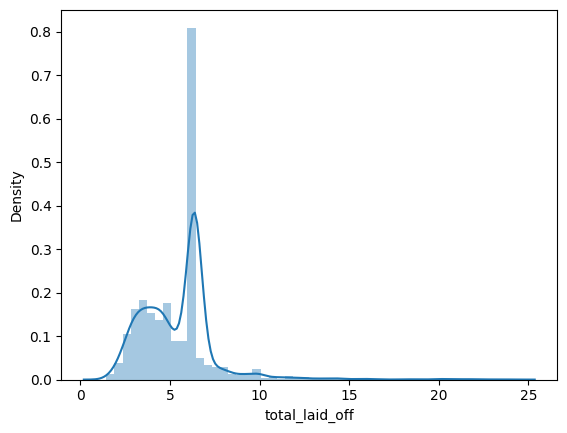

In [83]:
sns.distplot(np.cbrt(df['total_laid_off']))
np.cbrt(df['total_laid_off']).skew()

In [84]:
output=np.cbrt(df['total_laid_off'])

In [85]:
df

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,day,month,year
0,0,0,0,30.000000,0.20000,2024-05-16,0,0,222.0,16,5,2024
1,1,1,1,257.209793,0.06000,2024-05-16,1,0,3400.0,16,5,2024
2,2,2,2,100.000000,0.28071,2024-05-15,2,0,214.0,15,5,2024
3,3,3,2,36.000000,0.28071,2024-05-15,3,0,49.0,15,5,2024
4,4,4,3,257.209793,1.00000,2024-05-14,0,0,3.0,14,5,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
3607,2572,3,7,257.209793,1.00000,2020-03-16,8,0,5.1,16,3,2020
3608,2202,3,5,8.000000,0.10000,2020-03-13,0,0,45.0,13,3,2020
3609,2581,0,6,6.000000,0.75000,2020-03-13,8,0,1.0,13,3,2020
3610,2582,3,17,20.000000,0.40000,2020-03-12,10,0,90.0,12,3,2020


In [86]:
x = df[['company','location','industry','stage','country','funds_raised','day','month','year']]

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(x, output, test_size=0.3, random_state=0)

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

In [90]:
from sklearn import ensemble

In [91]:
model = ensemble.GradientBoostingRegressor(
    n_estimators=2000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber',
    random_state=0
)

In [92]:
model.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', max_depth=6, max_features=0.1,
                          min_samples_leaf=9, n_estimators=2000,
                          random_state=0)

In [93]:
from sklearn.metrics import mean_absolute_error

In [94]:
mse = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.2197


In [95]:
mse = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 1.5444


In [96]:
import pickle

pickle.dump(model,open('gradient_boost.pkl','wb'))
gradient_boost = pickle.load(open('gradient_boost.pkl','rb'))

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)

In [98]:
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [99]:
from sklearn.metrics import mean_absolute_error

In [100]:
mse = mean_absolute_error(y_train, forest_model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

Training Set Mean Absolute Error: 0.5434


In [101]:
mse = mean_absolute_error(y_test, forest_model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)

Test Set Mean Absolute Error: 1.4992


In [102]:
import pickle

pickle.dump(forest_model,open('RandomForest.pkl','wb'))
RandomForest = pickle.load(open('RandomForest.pkl','rb'))

In [103]:
# from sklearn.metrics import mean_absolute_error

# # Assuming you have calculated the MAE
# mae = mean_absolute_error(y_train, forest_model.predict(X_train))

# # Calculate the mean of the actual values
# mean_actual = y_train.mean()

# # Convert MAE to percentage
# mae_percentage = (mae / mean_actual) * 100

# print("Training Set Mean Absolute Error Percentage: %.4f%%" % mae_percentage)

In [104]:
# ss = ['SF Bay Area', 'Philadelphia', 'Austin', 'Los Angeles', 'Boston', 'Pittsburgh', 'Portland', 'New Delhi', 'Bengaluru', 'London', 'San Diego', 'Orlando', 'New York City', 'Atlanta', 'Madrid', 'Seattle', 'Hartford', 'Denver', 'Sacramento', 'Prague', 'Salt Lake City', 'Ghent', 'Tampa Bay', 'Detroit', 'Paris', 'Barcelona', 'Dublin', 'Santiago', 'Copenhagen', 'Vancouver', 'Montreal', 'Miami', 'Pune', 'Lagos', 'Tel Aviv', 'Singapore', 'Yavne', "Xi'an", 'Lehi', 'Amsterdam', 'Phoenix', 'Gurugram', 'Vilnius', 'Chennai', 'Sydney', 'Krakow', 'Manchester', 'Boulder', 'Stockholm', 'Ann Arbor', 'Nashik', 'Berlin', 'Oslo', 'Chicago', 'Baltimore', 'Espoo', 'Fort Collins', 'Toronto', 'Salisbury', 'Cayman Islands', 'Brno', 'Santa Barbara', 'Minneapolis', 'Munich', 'Walldorf', 'Vienna', 'Jakarta', 'Washington D.C.', 'Dallas', 'Tokyo', 'Columbus', 'Tallinn', 'Karachi', 'Hamburg', 'Saskatoon', 'Memphis', 'Corvallis', 'Norwalk', 'Milwaukee', 'Noida', 'Charleston', 'Haifa', 'Shanghai', 'Lodz', 'Nashville', 'Abuja', 'Santa Fe', 'Mumbai', 'Ibadan', 'St. Louis', 'Omaha', 'Bucharest', 'Birmingham', 'Beijing', 'St. Gallen', 'Helsinki', 'Shenzen', 'Calgary', 'Kansas City', 'Stamford', 'Leeds', 'Zurich', 'Sao Paulo', 'Jacksonville', 'Raleigh', 'Edinburgh', 'Charlotte', 'Belo Horizonte', 'Accra', 'Hong Kong', 'Nairobi', 'Kolkata', 'Indianapolis', 'Sandnes', 'Melbourne', 'Auckland', 'Luxembourg', 'Lexington', 'Evansville', "Ra'anana", 'Mexico City', 'Førde', 'Boise', 'Alamosa', 'Seoul', 'Reno', 'Chemnitz', 'Charlottesville', 'Kfar Saba', 'Hangzhou', 'Houston', 'Norfolk', 'Cluj-Napoca', 'Las Vegas', 'Brisbane', 'Ottawa', 'Riyadh', 'Wrocław', 'Manila', 'Zug', 'Cincinnati', 'Little Rock', 'Cleveland', 'Monterrey', 'Nashua', 'San Antonio', 'New Hope', 'Kyiv', 'Geneva', 'Chester', 'Warsaw', 'Linz', 'Madison', 'Kitchener', 'Wellington', 'Gydnia', 'Blumenau', 'Baton Rouge', 'Albany', 'Milan', 'Frankfurt', 'Waterloo', 'Karlsruhe', 'Curitiba', 'New Haven', 'Coimbra', 'Jersey City', 'Kiel', 'Oxford', 'Wilmington', 'Providence', 'Bogota', 'Durham', 'Buenos Aires', 'Indore', 'Patna', 'Bismarck', 'Grand Rapids', 'Beau Vallon', 'Utrecht', 'Burlington', 'Bend', 'Guadalajara', 'Cairo', 'Dubai', 'Gothenburg', 'Dover', 'Malmö', 'Logan', 'Eindhoven', 'Athens', 'Hyderabad', 'Nebraska City', 'Non-U.S.', 'Trondheim', 'Düsseldorf', 'San Luis Obispo', 'Jerusalem', 'Brussels', 'The Hague', 'Kuala Lumpur', 'Bristol', 'Budapest', 'Ho Chi Minh City', 'Winnipeg', 'Bangkok', 'Richmond', 'Porto Alegre', 'Victoria', 'Ferdericton', 'Dakar', 'Florianópolis', 'Lahore', 'Louisville', 'Huntsville', 'Spokane', 'Lima', 'Malmo', 'Brasilia', 'Selangor', 'Manama', 'Istanbul', 'Moscow', 'Davenport', 'Toulouse', 'Montevideo', 'Fayetteville', 'Sofia', 'Cork', 'Ahmedabad', 'Joinville', 'Hanoi', 'Dusseldorf', 'Lisbon', 'Cape Town', 'Missoula', 'Quebec', 'Yangon', 'New Orleans']

In [105]:
# ss = ['SF Bay Area', 'Philadelphia', 'Austin', 'Los Angeles',]

# options = ""
# for city in ss:
#     options += f'<option value="">{city}</option>\n'
#     for i in range(4):
#         options += f'<option value="{i}"></option>\n'

# print(options)

In [106]:

# ss = ['SF Bay Area', 'Philadelphia', 'Austin', 'Los Angeles',]
# options = ""
# for i, x in range(4),ss:
#     options += f'<option value="{i}">{x}</option>\n'

# print(options)

In [107]:
# ss = ['SF Bay Area', 'Philadelphia', 'Austin', 'Los Angeles']
# options = ""
# for i, x in enumerate(ss):
#     options += f'<option value="{i}">{x}</option>\n'

# print(options)

In [108]:
# cities = ['SF Bay Area', 'Philadelphia', 'Austin', 'Los Angeles', 'Boston', 'Pittsburgh', 'Portland', 'New Delhi', 'Bengaluru', 'London', 'San Diego', 'Orlando', 'New York City', 'Atlanta', 'Madrid', 'Seattle', 'Hartford', 'Denver', 'Sacramento', 'Prague', 'Salt Lake City', 'Ghent', 'Tampa Bay', 'Detroit', 'Paris', 'Barcelona', 'Dublin', 'Santiago', 'Copenhagen', 'Vancouver', 'Montreal', 'Miami', 'Pune', 'Lagos', 'Tel Aviv', 'Singapore', 'Yavne', "Xi'an", 'Lehi', 'Amsterdam', 'Phoenix', 'Gurugram', 'Vilnius', 'Chennai', 'Sydney', 'Krakow', 'Manchester', 'Boulder', 'Stockholm', 'Ann Arbor', 'Nashik', 'Berlin', 'Oslo', 'Chicago', 'Baltimore', 'Espoo', 'Fort Collins', 'Toronto', 'Salisbury', 'Cayman Islands', 'Brno', 'Santa Barbara', 'Minneapolis', 'Munich', 'Walldorf', 'Vienna', 'Jakarta', 'Washington D.C.', 'Dallas', 'Tokyo', 'Columbus', 'Tallinn', 'Karachi', 'Hamburg', 'Saskatoon', 'Memphis', 'Corvallis', 'Norwalk', 'Milwaukee', 'Noida', 'Charleston', 'Haifa', 'Shanghai', 'Lodz', 'Nashville', 'Abuja', 'Santa Fe', 'Mumbai', 'Ibadan', 'St. Louis', 'Omaha', 'Bucharest', 'Birmingham', 'Beijing', 'St. Gallen', 'Helsinki', 'Shenzen', 'Calgary', 'Kansas City', 'Stamford', 'Leeds', 'Zurich', 'Sao Paulo', 'Jacksonville', 'Raleigh', 'Edinburgh', 'Charlotte', 'Belo Horizonte', 'Accra', 'Hong Kong', 'Nairobi', 'Kolkata', 'Indianapolis', 'Sandnes', 'Melbourne', 'Auckland', 'Luxembourg', 'Lexington', 'Evansville', "Ra'anana", 'Mexico City', 'Førde', 'Boise', 'Alamosa', 'Seoul', 'Reno', 'Chemnitz', 'Charlottesville', 'Kfar Saba', 'Hangzhou', 'Houston', 'Norfolk', 'Cluj-Napoca', 'Las Vegas', 'Brisbane', 'Ottawa', 'Riyadh', 'Wrocław', 'Manila', 'Zug', 'Cincinnati', 'Little Rock', 'Cleveland', 'Monterrey', 'Nashua', 'San Antonio', 'New Hope', 'Kyiv', 'Geneva', 'Chester', 'Warsaw', 'Linz', 'Madison', 'Kitchener', 'Wellington', 'Gydnia', 'Blumenau', 'Baton Rouge', 'Albany', 'Milan', 'Frankfurt', 'Waterloo', 'Karlsruhe', 'Curitiba', 'New Haven', 'Coimbra', 'Jersey City', 'Kiel', 'Oxford', 'Wilmington', 'Providence', 'Bogota', 'Durham', 'Buenos Aires', 'Indore', 'Patna', 'Bismarck', 'Grand Rapids', 'Beau Vallon', 'Utrecht', 'Burlington', 'Bend', 'Guadalajara', 'Cairo', 'Dubai', 'Gothenburg', 'Dover', 'Malmö', 'Logan', 'Eindhoven', 'Athens', 'Hyderabad', 'Nebraska City', 'Non-U.S.', 'Trondheim', 'Düsseldorf', 'San Luis Obispo', 'Jerusalem', 'Brussels', 'The Hague', 'Kuala Lumpur', 'Bristol', 'Budapest', 'Ho Chi Minh City', 'Winnipeg', 'Bangkok', 'Richmond', 'Porto Alegre', 'Victoria', 'Ferdericton', 'Dakar', 'Florianópolis', 'Lahore', 'Louisville', 'Huntsville', 'Spokane', 'Lima', 'Malmo', 'Brasilia', 'Selangor', 'Manama', 'Istanbul', 'Moscow', 'Davenport', 'Toulouse', 'Montevideo', 'Fayetteville', 'Sofia', 'Cork', 'Ahmedabad', 'Joinville', 'Hanoi', 'Dusseldorf', 'Lisbon', 'Cape Town', 'Missoula', 'Quebec', 'Yangon', 'New Orleans']
# companies = {}

# for index, city in enumerate(cities):
#     companies[str(index)] = city

In [109]:
# print(companies)

In [110]:
 
# ss = {'0': 'SF Bay Area', '1': 'Philadelphia', '2': 'Austin', '3': 'Los Angeles', '4': 'Boston', '5': 'Pittsburgh', '6': 'Portland', '7': 'New Delhi', '8': 'Bengaluru', '9': 'London', '10': 'San Diego', '11': 'Orlando', '12': 'New York City', '13': 'Atlanta', '14': 'Madrid', '15': 'Seattle', '16': 'Hartford', '17': 'Denver', '18': 'Sacramento', '19': 'Prague', '20': 'Salt Lake City', '21': 'Ghent', '22': 'Tampa Bay', '23': 'Detroit', '24': 'Paris', '25': 'Barcelona', '26': 'Dublin', '27': 'Santiago', '28': 'Copenhagen', '29': 'Vancouver', '30': 'Montreal', '31': 'Miami', '32': 'Pune', '33': 'Lagos', '34': 'Tel Aviv', '35': 'Singapore', '36': 'Yavne', '37': "Xi'an", '38': 'Lehi', '39': 'Amsterdam', '40': 'Phoenix', '41': 'Gurugram', '42': 'Vilnius', '43': 'Chennai', '44': 'Sydney', '45': 'Krakow', '46': 'Manchester', '47': 'Boulder', '48': 'Stockholm', '49': 'Ann Arbor', '50': 'Nashik', '51': 'Berlin', '52': 'Oslo', '53': 'Chicago', '54': 'Baltimore', '55': 'Espoo', '56': 'Fort Collins', '57': 'Toronto', '58': 'Salisbury', '59': 'Cayman Islands', '60': 'Brno', '61': 'Santa Barbara', '62': 'Minneapolis', '63': 'Munich', '64': 'Walldorf', '65': 'Vienna', '66': 'Jakarta', '67': 'Washington D.C.', '68': 'Dallas', '69': 'Tokyo', '70': 'Columbus', '71': 'Tallinn', '72': 'Karachi', '73': 'Hamburg', '74': 'Saskatoon', '75': 'Memphis', '76': 'Corvallis', '77': 'Norwalk', '78': 'Milwaukee', '79': 'Noida', '80': 'Charleston', '81': 'Haifa', '82': 'Shanghai', '83': 'Lodz', '84': 'Nashville', '85': 'Abuja', '86': 'Santa Fe', '87': 'Mumbai', '88': 'Ibadan', '89': 'St. Louis', '90': 'Omaha', '91': 'Bucharest', '92': 'Birmingham', '93': 'Beijing', '94': 'St. Gallen', '95': 'Helsinki', '96': 'Shenzen', '97': 'Calgary', '98': 'Kansas City', '99': 'Stamford', '100': 'Leeds', '101': 'Zurich', '102': 'Sao Paulo', '103': 'Jacksonville', '104': 'Raleigh', '105': 'Edinburgh', '106': 'Charlotte', '107': 'Belo Horizonte', '108': 'Accra', '109': 'Hong Kong', '110': 'Nairobi', '111': 'Kolkata', '112': 'Indianapolis', '113': 'Sandnes', '114': 'Melbourne', '115': 'Auckland', '116': 'Luxembourg', '117': 'Lexington', '118': 'Evansville', '119': "Ra'anana", '120': 'Mexico City', '121': 'Førde', '122': 'Boise', '123': 'Alamosa', '124': 'Seoul', '125': 'Reno', '126': 'Chemnitz', '127': 'Charlottesville', '128': 'Kfar Saba', '129': 'Hangzhou', '130': 'Houston', '131': 'Norfolk', '132': 'Cluj-Napoca', '133': 'Las Vegas', '134': 'Brisbane', '135': 'Ottawa', '136': 'Riyadh', '137': 'Wrocław', '138': 'Manila', '139': 'Zug', '140': 'Cincinnati', '141': 'Little Rock', '142': 'Cleveland', '143': 'Monterrey', '144': 'Nashua', '145': 'San Antonio', '146': 'New Hope', '147': 'Kyiv', '148': 'Geneva', '149': 'Chester', '150': 'Warsaw', '151': 'Linz', '152': 'Madison', '153': 'Kitchener', '154': 'Wellington', '155': 'Gydnia', '156': 'Blumenau', '157': 'Baton Rouge', '158': 'Albany', '159': 'Milan', '160': 'Frankfurt', '161': 'Waterloo', '162': 'Karlsruhe', '163': 'Curitiba', '164': 'New Haven', '165': 'Coimbra', '166': 'Jersey City', '167': 'Kiel', '168': 'Oxford', '169': 'Wilmington', '170': 'Providence', '171': 'Bogota', '172': 'Durham', '173': 'Buenos Aires', '174': 'Indore', '175': 'Patna', '176': 'Bismarck', '177': 'Grand Rapids', '178': 'Beau Vallon', '179': 'Utrecht', '180': 'Burlington', '181': 'Bend', '182': 'Guadalajara', '183': 'Cairo', '184': 'Dubai', '185': 'Gothenburg', '186': 'Dover', '187': 'Malmö', '188': 'Logan', '189': 'Eindhoven', '190': 'Athens', '191': 'Hyderabad', '192': 'Nebraska City', '193': 'Non-U.S.', '194': 'Trondheim', '195': 'Düsseldorf', '196': 'San Luis Obispo', '197': 'Jerusalem', '198': 'Brussels', '199': 'The Hague', '200': 'Kuala Lumpur', '201': 'Bristol', '202': 'Budapest', '203': 'Ho Chi Minh City', '204': 'Winnipeg', '205': 'Bangkok', '206': 'Richmond', '207': 'Porto Alegre', '208': 'Victoria', '209': 'Ferdericton', '210': 'Dakar', '211': 'Florianópolis', '212': 'Lahore', '213': 'Louisville', '214': 'Huntsville', '215': 'Spokane', '216': 'Lima', '217': 'Malmo', '218': 'Brasilia', '219': 'Selangor', '220': 'Manama', '221': 'Istanbul', '222': 'Moscow', '223': 'Davenport', '224': 'Toulouse', '225': 'Montevideo', '226': 'Fayetteville', '227': 'Sofia', '228': 'Cork', '229': 'Ahmedabad', '230': 'Joinville', '231': 'Hanoi', '232': 'Dusseldorf', '233': 'Lisbon', '234': 'Cape Town', '235': 'Missoula', '236': 'Quebec', '237': 'Yangon', '238': 'New Orleans'}
 

In [111]:
 

# keys_list = list(ss.keys())
# values_list = list(ss.values())

# print("Keys =", keys_list)
# print("Value s=", values_list)

In [112]:
# keys = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '232', '233', '234', '235', '236', '237', '238']

# values = ['SF Bay Area', 'Philadelphia', 'Austin', 'Los Angeles', 'Boston', 'Pittsburgh', 'Portland', 'New Delhi', 'Bengaluru', 'London', 'San Diego', 'Orlando', 'New York City', 'Atlanta', 'Madrid', 'Seattle', 'Hartford', 'Denver', 'Sacramento', 'Prague', 'Salt Lake City', 'Ghent', 'Tampa Bay', 'Detroit', 'Paris', 'Barcelona', 'Dublin', 'Santiago', 'Copenhagen', 'Vancouver', 'Montreal', 'Miami', 'Pune', 'Lagos', 'Tel Aviv', 'Singapore', 'Yavne', "Xi'an", 'Lehi', 'Amsterdam', 'Phoenix', 'Gurugram', 'Vilnius', 'Chennai', 'Sydney', 'Krakow', 'Manchester', 'Boulder', 'Stockholm', 'Ann Arbor', 'Nashik', 'Berlin', 'Oslo', 'Chicago', 'Baltimore', 'Espoo', 'Fort Collins', 'Toronto', 'Salisbury', 'Cayman Islands', 'Brno', 'Santa Barbara', 'Minneapolis', 'Munich', 'Walldorf', 'Vienna', 'Jakarta', 'Washington D.C.', 'Dallas', 'Tokyo', 'Columbus', 'Tallinn', 'Karachi', 'Hamburg', 'Saskatoon', 'Memphis', 'Corvallis', 'Norwalk', 'Milwaukee', 'Noida', 'Charleston', 'Haifa', 'Shanghai', 'Lodz', 'Nashville', 'Abuja', 'Santa Fe', 'Mumbai', 'Ibadan', 'St. Louis', 'Omaha', 'Bucharest', 'Birmingham', 'Beijing', 'St. Gallen', 'Helsinki', 'Shenzen', 'Calgary', 'Kansas City', 'Stamford', 'Leeds', 'Zurich', 'Sao Paulo', 'Jacksonville', 'Raleigh', 'Edinburgh', 'Charlotte', 'Belo Horizonte', 'Accra', 'Hong Kong', 'Nairobi', 'Kolkata', 'Indianapolis', 'Sandnes', 'Melbourne', 'Auckland', 'Luxembourg', 'Lexington', 'Evansville', "Ra'anana", 'Mexico City', 'Førde', 'Boise', 'Alamosa', 'Seoul', 'Reno', 'Chemnitz', 'Charlottesville', 'Kfar Saba', 'Hangzhou', 'Houston', 'Norfolk', 'Cluj-Napoca', 'Las Vegas', 'Brisbane', 'Ottawa', 'Riyadh', 'Wrocław', 'Manila', 'Zug', 'Cincinnati', 'Little Rock', 'Cleveland', 'Monterrey', 'Nashua', 'San Antonio', 'New Hope', 'Kyiv', 'Geneva', 'Chester', 'Warsaw', 'Linz', 'Madison', 'Kitchener', 'Wellington', 'Gydnia', 'Blumenau', 'Baton Rouge', 'Albany', 'Milan', 'Frankfurt', 'Waterloo', 'Karlsruhe', 'Curitiba', 'New Haven', 'Coimbra', 'Jersey City', 'Kiel', 'Oxford', 'Wilmington', 'Providence', 'Bogota', 'Durham', 'Buenos Aires', 'Indore', 'Patna', 'Bismarck', 'Grand Rapids', 'Beau Vallon', 'Utrecht', 'Burlington', 'Bend', 'Guadalajara', 'Cairo', 'Dubai', 'Gothenburg', 'Dover', 'Malmö', 'Logan', 'Eindhoven', 'Athens', 'Hyderabad', 'Nebraska City', 'Non-U.S.', 'Trondheim', 'Düsseldorf', 'San Luis Obispo', 'Jerusalem', 'Brussels', 'The Hague', 'Kuala Lumpur', 'Bristol', 'Budapest', 'Ho Chi Minh City', 'Winnipeg', 'Bangkok', 'Richmond', 'Porto Alegre', 'Victoria', 'Ferdericton', 'Dakar', 'Florianópolis', 'Lahore', 'Louisville', 'Huntsville', 'Spokane', 'Lima', 'Malmo', 'Brasilia', 'Selangor', 'Manama', 'Istanbul', 'Moscow', 'Davenport', 'Toulouse', 'Montevideo', 'Fayetteville', 'Sofia', 'Cork', 'Ahmedabad', 'Joinville', 'Hanoi', 'Dusseldorf', 'Lisbon', 'Cape Town', 'Missoula', 'Quebec', 'Yangon', 'New Orleans']

# for i, key in enumerate(keys):
#     print(f"elif Location == '{key}':")
#     print(f"    choice = '{values[i]}'")

In [114]:
# print(companies)

In [115]:
 

# keys_list = list(sd.keys())
# values_list = list(sd.values())

# print("Keys =", keys_list)
# print("Value =", values_list)

In [116]:
# for i, key in enumerate(Keys):
#     print(f"elif Company == '{key}':")
#     print(f"    choices = '{Value[i]}'")